___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.__version__

'2.12.0'

In [3]:
df = pd.read_csv("Churn_Modelling.csv")
df 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [7]:
df.duplicated().sum()

0

In [8]:
df[df["IsActiveMember"] == df["Exited"]]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
10,11,15767821,Bearce,528,France,Male,31,6,102016.720,2,0,0,80181.120,0
11,12,15737173,Andrews,497,Spain,Male,24,3,0.000,2,1,0,76390.010,0
12,13,15632264,Kay,476,France,Female,34,10,0.000,2,1,0,26260.980,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.410,1,1,0,29179.520,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.000,2,0,0,167773.550,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1


In [9]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [10]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
df[df["Geography"] == "Germany"]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.740,4,1,0,119346.880,1
15,16,15643966,Goforth,616,Germany,Male,45,3,143129.410,2,0,1,64327.260,0
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.880,1,1,0,5097.670,1
26,27,15736816,Young,756,Germany,Male,36,2,136815.640,1,1,1,170041.950,0
28,29,15728693,McWilliams,574,Germany,Female,43,3,141349.430,1,1,1,100187.430,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.120,1,1,0,115146.400,1
9984,9985,15696175,Echezonachukwu,602,Germany,Male,35,7,90602.420,2,1,1,51695.410,0
9986,9987,15581736,Bartlett,673,Germany,Male,47,1,183579.540,2,0,1,34047.540,0
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.600,1,1,0,53667.080,0


In [12]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

0    7963
1    2037
Name: Exited, dtype: int64

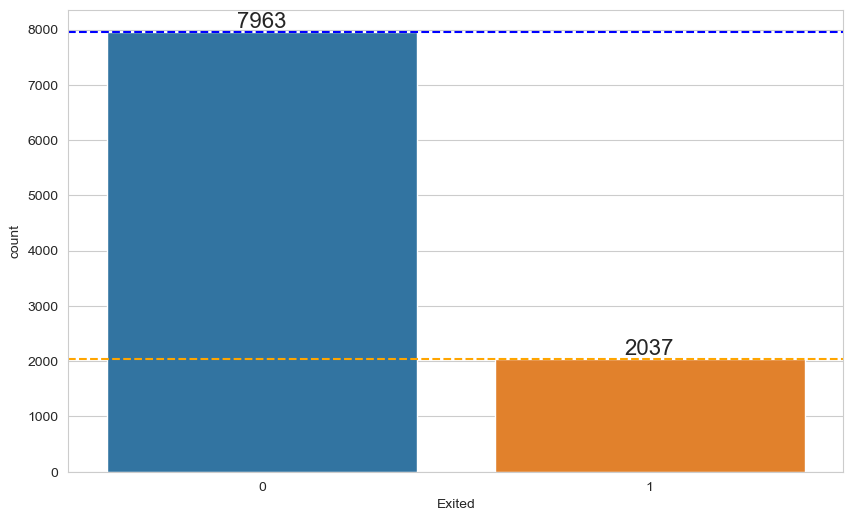

In [13]:
display(df.Exited.value_counts())
ax = sns.countplot(x=df["Exited"])
ax.bar_label(ax.containers[0], size=16)
plt.axhline(y=df.Exited.value_counts()[1], color='orange', linestyle='--')
plt.axhline(y=df.Exited.value_counts()[0], color='blue', linestyle='--');

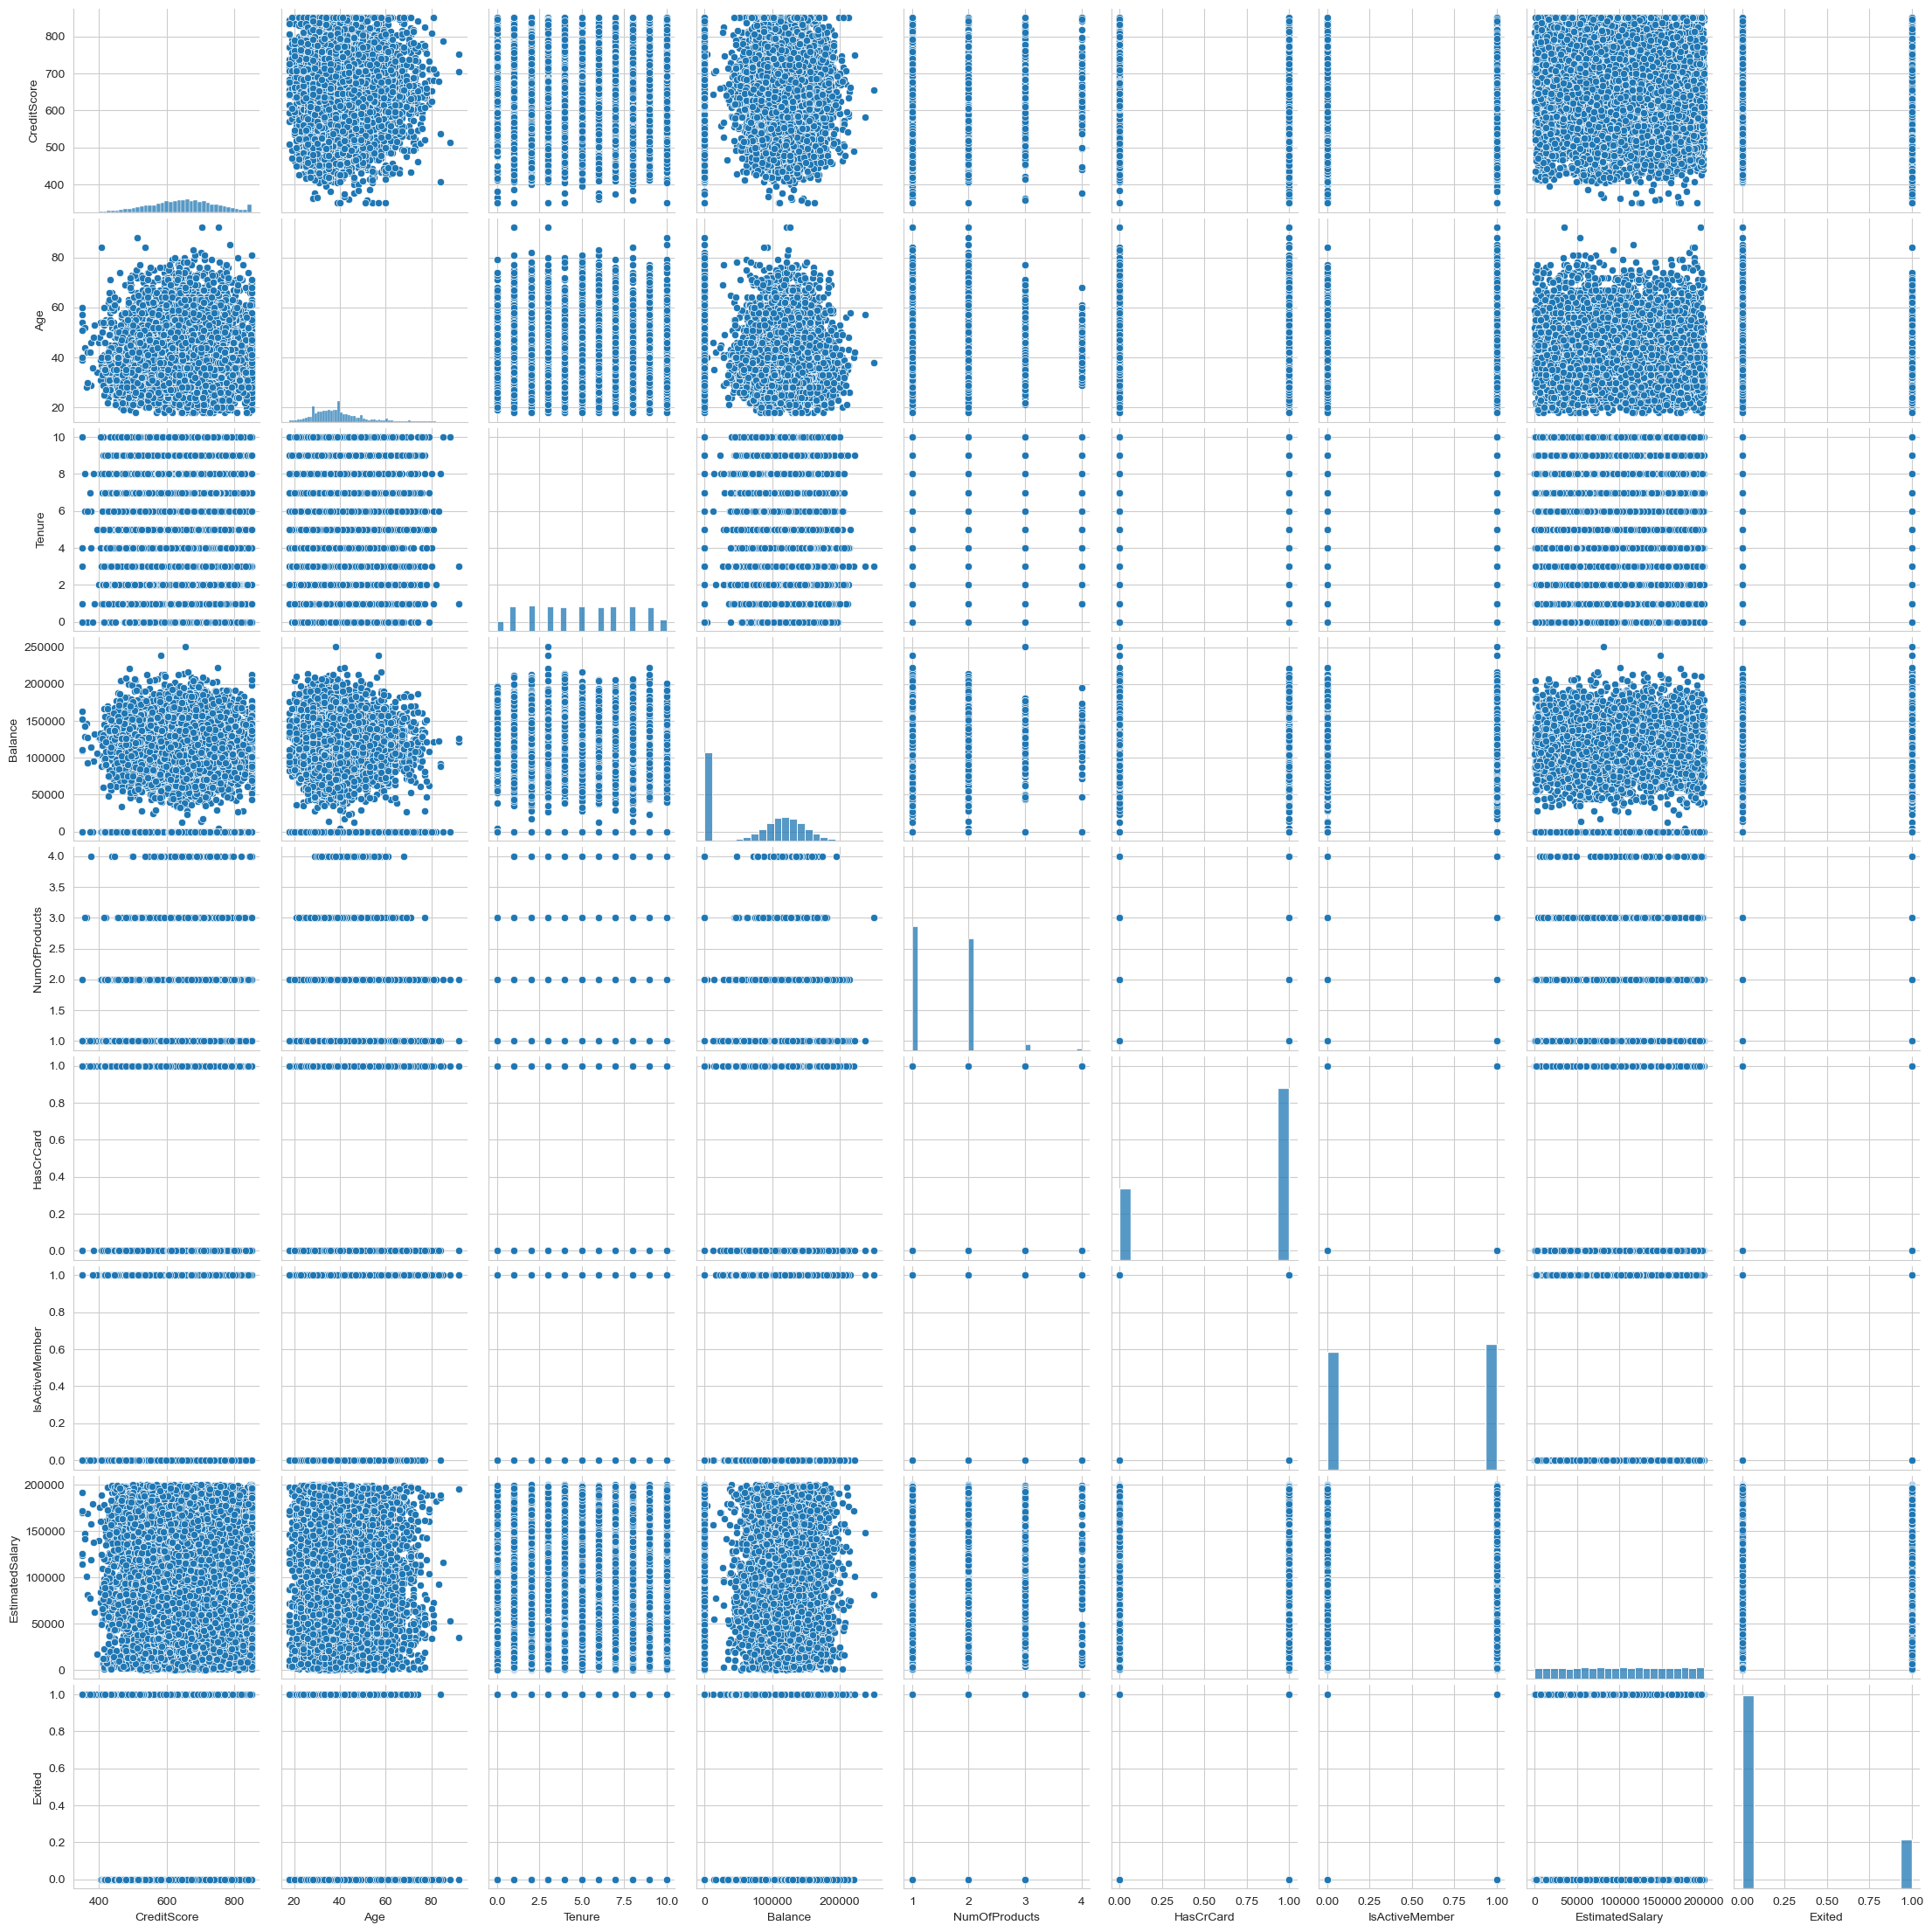

In [14]:
sns.pairplot(df);

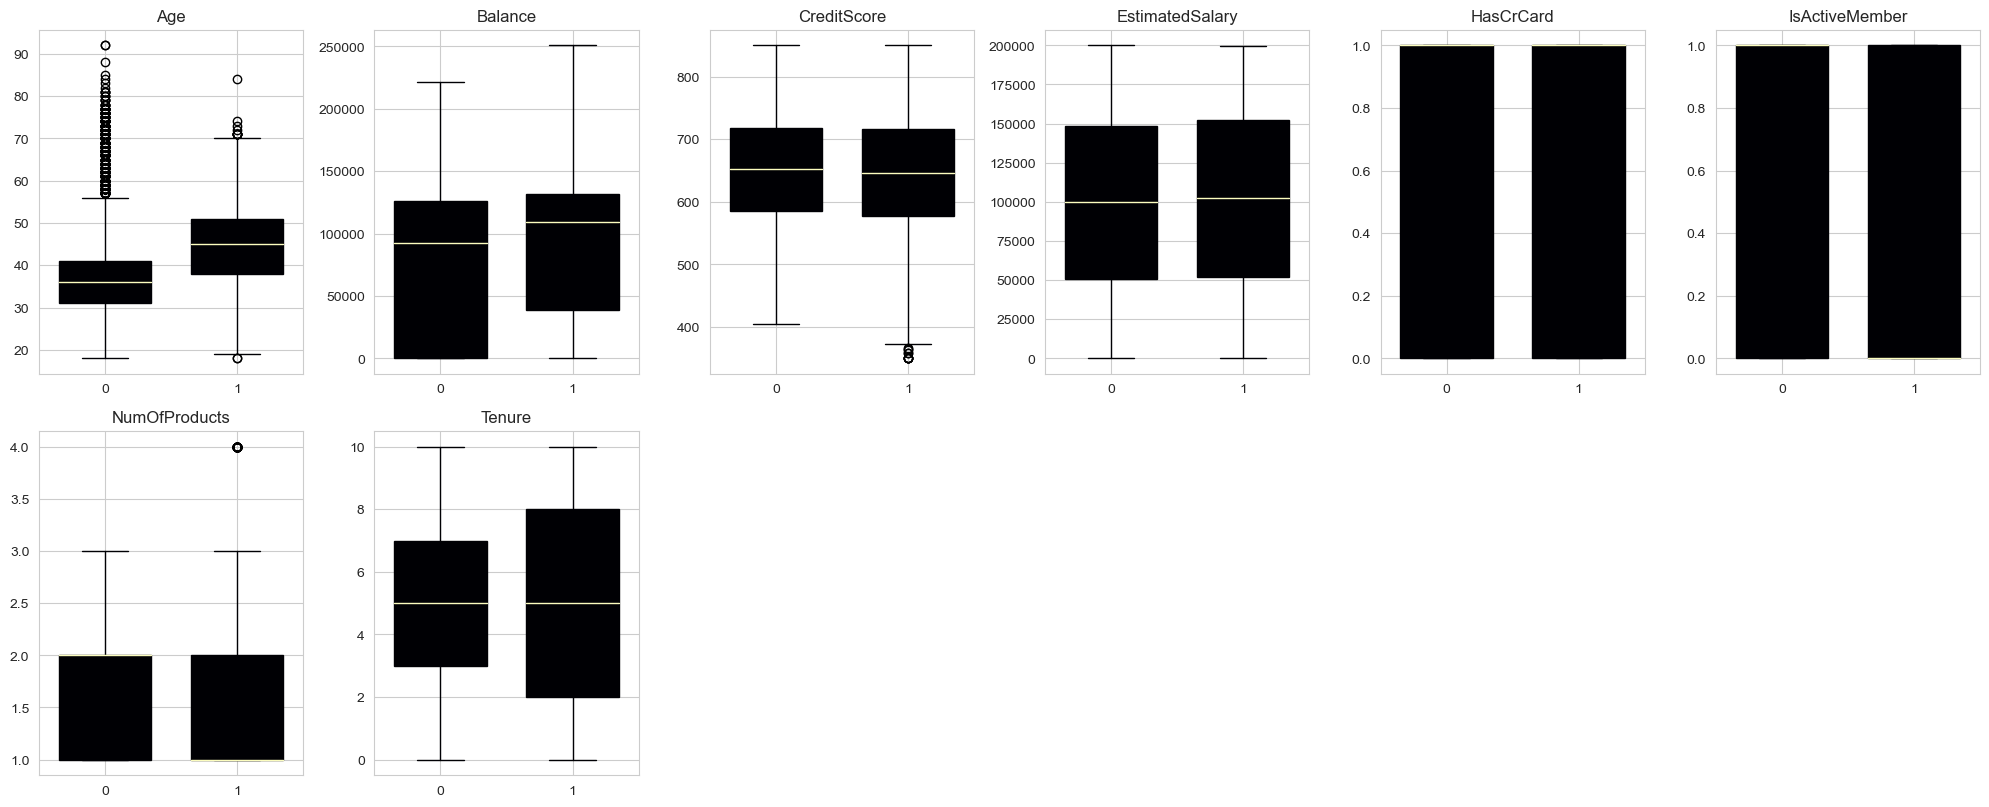

In [15]:
df.plot(kind="box",
        by="Exited", 
        layout=(5, 6), 
        subplots=True, 
        widths=0.7, 
        figsize=(20,20), 
        cmap="magma", 
        patch_artist=True)
plt.tight_layout();

# classification problemlerinde outlier tespiti yaparken class bazında bakmazsak hata yapabiliriz.

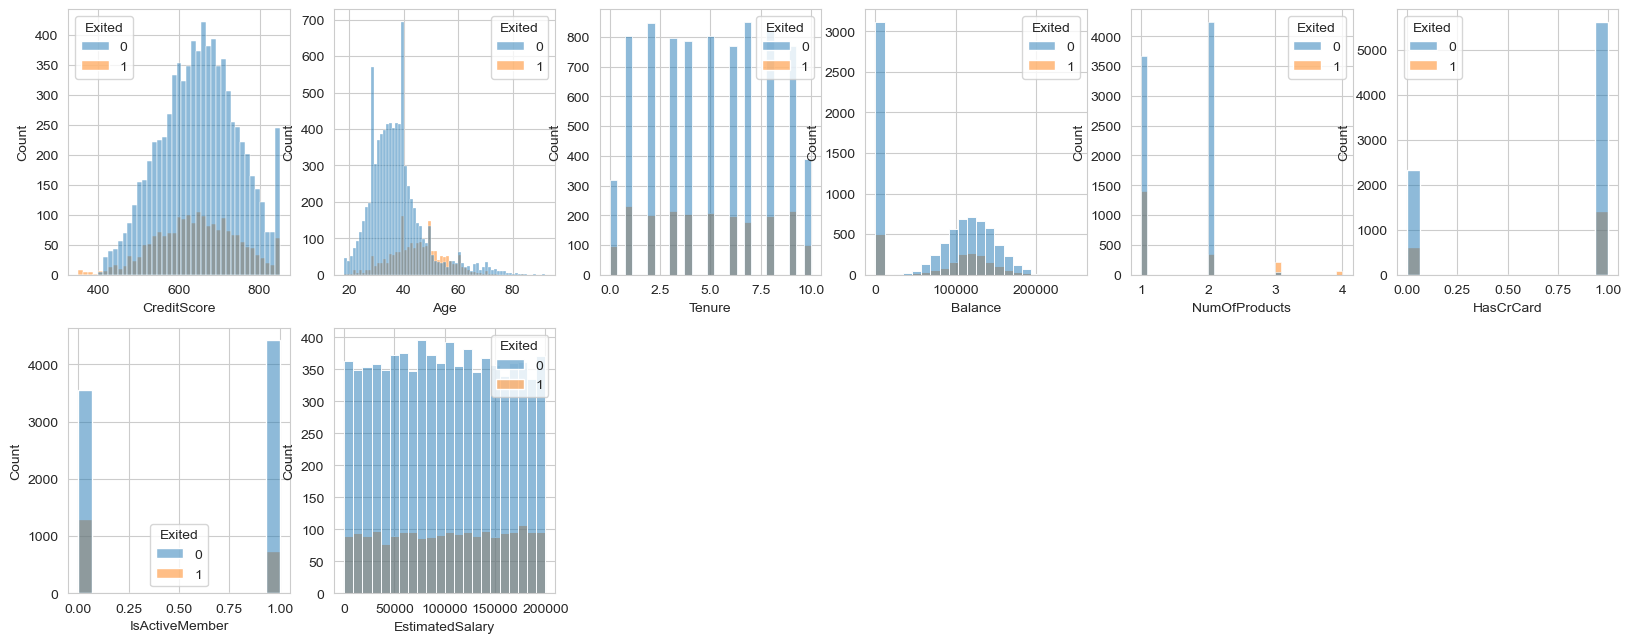

In [16]:
plt.figure(figsize=(20, 20))
for idx, col in enumerate(df.select_dtypes(include='number').columns[:-1]):
    plt.subplot(5, 6, idx+1)
    sns.histplot(data=df, x=col, hue='Exited')

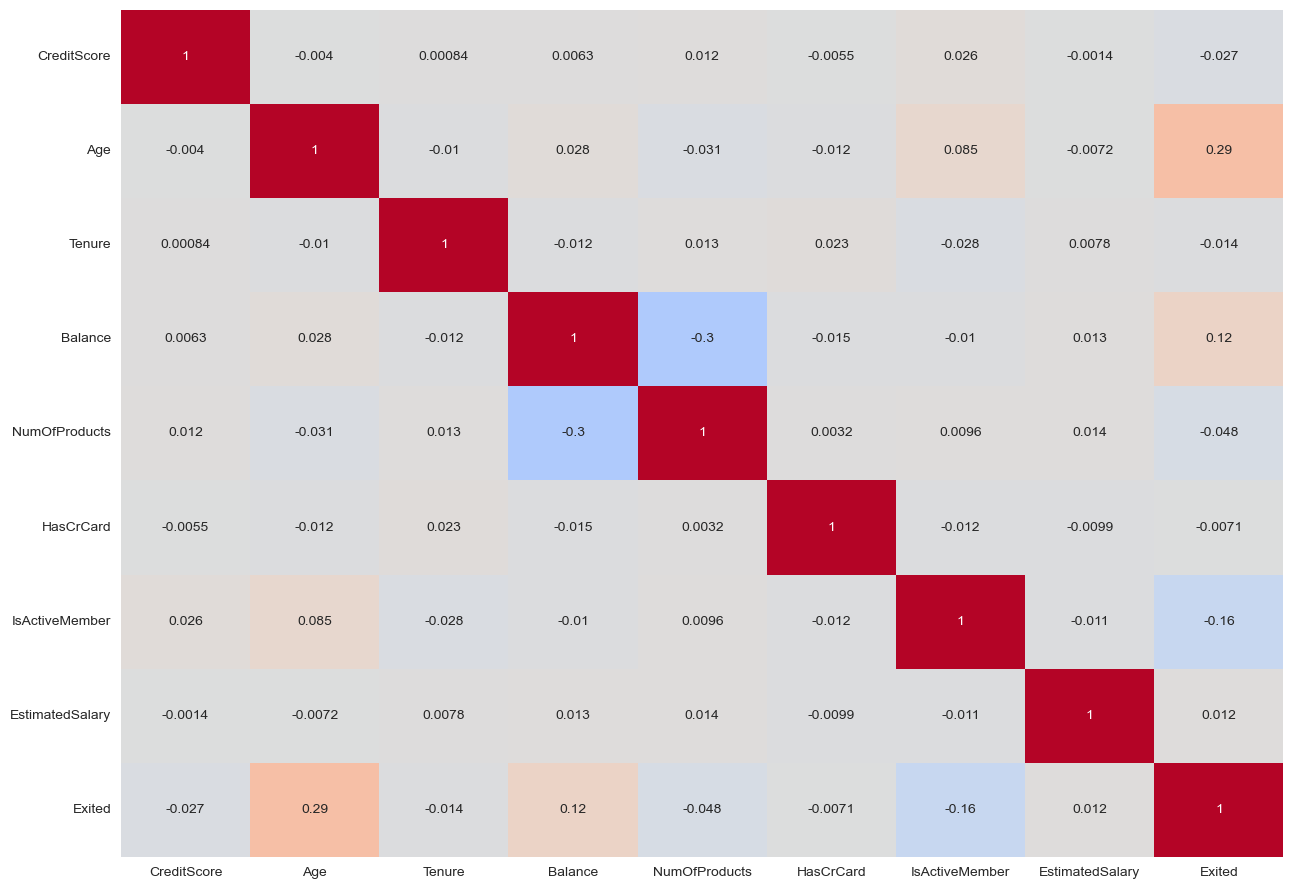

In [17]:
plt.figure(figsize=(15, 11))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm", cbar=False) #numeric_only=True
plt.show()

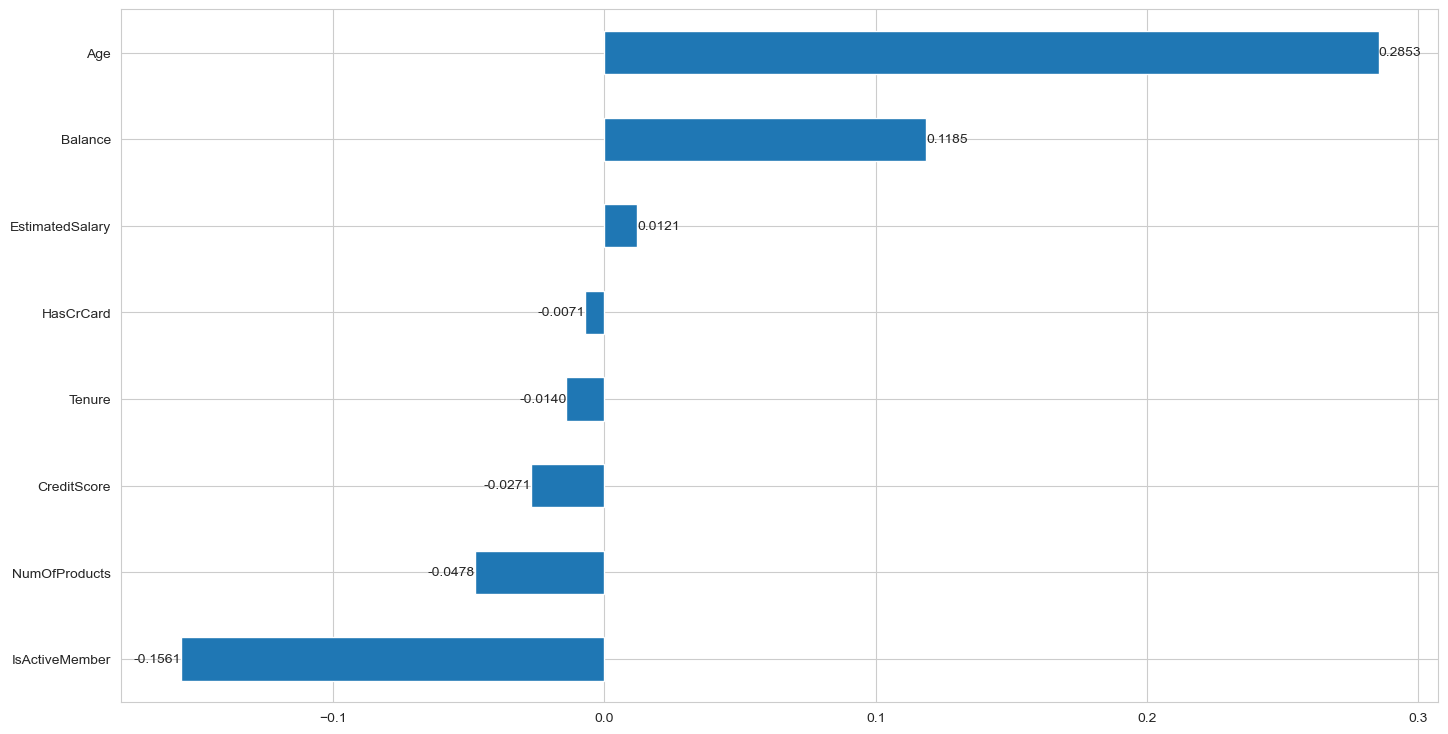

In [18]:
plt.figure(figsize=(17, 9))
ax = df.corr()["Exited"].sort_values().drop("Exited").plot(kind="barh")
ax.bar_label(ax.containers[0], fmt="%.4f")
plt.show()

In [19]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Preprocessing of Data
- Train | Test Split, Scalling

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,RobustScaler

In [21]:
seed = 13

In [22]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [23]:
## classification problemlerinde özellikle imbalanced datalarda validation_split kullanmak bizim kötü skorlar almamıza neden
# olabilir . Bundan dolayı validation_data belirlememiz gerekiyor.

X_train1, X_test, y_train1, y_test = train_test_split(
    X, y, stratify=y, test_size=0.1, random_state=seed 
)

# classların dağılımının oranını göz önünde bulundurarak bu train datasını ve test datasını ayırdık.

X_train, X_val, y_train, y_val = train_test_split(
    X_train1, y_train1, stratify=y_train1, test_size=0.1, random_state=seed 
)

# classların dağılımının oranını göz önünde bulundurarak bu train datasını ve validation datasını ayırdık.

In [24]:
scaler = MinMaxScaler()
#scaler = RobustScaler()
# ann arka planda gradient descent çalıştırdığı için scaler'a ihtiyaç duyar.
## bütün scaling çeşitlerini deneyebiliriz  MinMaxScaler(), RobustScaler()den daha iyi skorlar verdiğinden onunla devam ediyorum.

In [25]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score

In [27]:
X_train.shape

(8100, 11)

In [28]:
X_val.shape

(900, 11)

In [29]:
X_test.shape

(1000, 11)

In [30]:
tf.keras.utils.set_random_seed(seed)

# biz normalde modelin mimarisini her kurduğumuzda random olarak ağırlıkları ve bias'leri atıyor ama biz şimdi 
# bazı kavramlar göreceğiz onların farklarını görebilmek için 
# tf.keras.utils.set_random_seed(seed)  ile model her çalıştığında aynı ağırlıkları atasın istiyorum.

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
#model.add(Activation("relu")) # Activation function can be added separately as a different line after each layer. 
model.add(Dense(1, activation = "sigmoid"))

# targetımız binary bir yapıda olduğundan  output layerda 1  nöron olacak şekilde mimamirizi oluşturuyoruz.
# activation = "sigmoid" yazdığımıza dikkat edelim hiçbir şey yazmazsak defatulu linear'di hatırlarsak.

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])


# problemimiz classification problemi olduğundan loss = "binary_crossentropy" yapıyoruz .
# optimizer hyperparametresi ağırlıkları güncellerken ; 
# hangi gradient descent türünü kullanmak istediğimizle alakalıdır 'rmsprop' gibi "adam" gibi optimizer çeşitlerini deneyerek
# en iyi sonucu hangisi veriyorsa yola onunla devam etmemiz gerekir burada optimizer türü datadan dataya göre farklılık gösterir
#metrics=["accuracy"] ile, modelin accuracy'sinin de takip edilebileceğini belirtiyoruz.
# Bu, eğitim sırasında modelin accuracy'sini de izlememize olanak sağlar.
# biz bütün classları %100 başarıyla tahmin edersek loss = binary_crossentropy sıfır çıkar teoride.

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                432       
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,279
Trainable params: 1,279
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(11, 36) dtype=float32, numpy=
 array([[ 0.05139628, -0.12879306,  0.3538316 , -0.16643637, -0.06049335,
         -0.23873135, -0.03222984, -0.0521985 , -0.03717667,  0.11173043,
         -0.22769283, -0.06616026, -0.1938907 ,  0.21402079,  0.13506979,
          0.03465185, -0.07389921,  0.23075396,  0.1668346 , -0.3306573 ,
         -0.22328404,  0.12978053, -0.1741214 , -0.25747162, -0.2475267 ,
          0.12857386,  0.00449789, -0.22374089,  0.284051  ,  0.2920336 ,
          0.20840609, -0.24984102,  0.03629303,  0.21094453, -0.3506614 ,
          0.11598828],
        [ 0.09108883, -0.06728846, -0.2511057 , -0.26932162, -0.02056178,
          0.29280692, -0.27475947, -0.14746141, -0.14990854,  0.19148636,
          0.33664197,  0.13532671,  0.22648096,  0.07213739,  0.20865822,
         -0.2554431 ,  0.08953744, -0.08207899,  0.03248933, -0.10109082,
          0.14903533,  0.347592  ,  0.09898692, -0.16336372, -0.10579854,
         -0.0122216 ,

In [33]:
model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_val, y_val), 
          batch_size=32, 
          epochs=600,
          verbose=1)


#  validation_data=(X_val, y_val) yukarıda ayırdığımız validation datasını kullanıyoruz.

Epoch 1/600
254/254 [==============================] - 1s 2ms/step - loss: 0.5256 - accuracy: 0.7623 - val_loss: 0.4668 - val_accuracy: 0.7967
Epoch 2/600
254/254 [==============================] - 0s 1ms/step - loss: 0.4568 - accuracy: 0.8028 - val_loss: 0.4432 - val_accuracy: 0.8078
Epoch 3/600
254/254 [==============================] - 0s 2ms/step - loss: 0.4318 - accuracy: 0.8163 - val_loss: 0.4235 - val_accuracy: 0.8200
Epoch 4/600
254/254 [==============================] - 0s 1ms/step - loss: 0.4165 - accuracy: 0.8211 - val_loss: 0.4202 - val_accuracy: 0.8178
Epoch 5/600
254/254 [==============================] - 0s 1ms/step - loss: 0.4048 - accuracy: 0.8290 - val_loss: 0.4008 - val_accuracy: 0.8267
Epoch 6/600
254/254 [==============================] - 0s 1ms/step - loss: 0.3953 - accuracy: 0.8352 - val_loss: 0.3839 - val_accuracy: 0.8356
Epoch 7/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3849 - accuracy: 0.8427 - val_loss: 0.3712 - val_accuracy: 0.8467

Epoch 58/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.8690 - val_loss: 0.3235 - val_accuracy: 0.8656
Epoch 59/600
254/254 [==============================] - 0s 1ms/step - loss: 0.3143 - accuracy: 0.8698 - val_loss: 0.3241 - val_accuracy: 0.8711
Epoch 60/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3128 - accuracy: 0.8704 - val_loss: 0.3267 - val_accuracy: 0.8667
Epoch 61/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3139 - accuracy: 0.8720 - val_loss: 0.3216 - val_accuracy: 0.8744
Epoch 62/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3134 - accuracy: 0.8730 - val_loss: 0.3251 - val_accuracy: 0.8744
Epoch 63/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3116 - accuracy: 0.8714 - val_loss: 0.3414 - val_accuracy: 0.8644
Epoch 64/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3143 - accuracy: 0.8705 - val_loss: 0.3240 - val_accuracy:

Epoch 115/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3017 - accuracy: 0.8716 - val_loss: 0.3308 - val_accuracy: 0.8656
Epoch 116/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3022 - accuracy: 0.8754 - val_loss: 0.3332 - val_accuracy: 0.8656
Epoch 117/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3010 - accuracy: 0.8763 - val_loss: 0.3355 - val_accuracy: 0.8644
Epoch 118/600
254/254 [==============================] - 0s 1ms/step - loss: 0.3027 - accuracy: 0.8759 - val_loss: 0.3243 - val_accuracy: 0.8722
Epoch 119/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3009 - accuracy: 0.8762 - val_loss: 0.3347 - val_accuracy: 0.8744
Epoch 120/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2995 - accuracy: 0.8775 - val_loss: 0.3394 - val_accuracy: 0.8611
Epoch 121/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2992 - accuracy: 0.8768 - val_loss: 0.3273 - val_ac

254/254 [==============================] - 0s 2ms/step - loss: 0.2905 - accuracy: 0.8794 - val_loss: 0.3422 - val_accuracy: 0.8611
Epoch 172/600
254/254 [==============================] - 0s 1ms/step - loss: 0.2886 - accuracy: 0.8849 - val_loss: 0.3459 - val_accuracy: 0.8656
Epoch 173/600
254/254 [==============================] - 0s 1ms/step - loss: 0.2903 - accuracy: 0.8816 - val_loss: 0.3495 - val_accuracy: 0.8644
Epoch 174/600
254/254 [==============================] - 0s 1ms/step - loss: 0.2882 - accuracy: 0.8815 - val_loss: 0.3406 - val_accuracy: 0.8633
Epoch 175/600
254/254 [==============================] - 0s 1ms/step - loss: 0.2897 - accuracy: 0.8830 - val_loss: 0.3432 - val_accuracy: 0.8656
Epoch 176/600
254/254 [==============================] - 0s 1ms/step - loss: 0.2879 - accuracy: 0.8826 - val_loss: 0.3418 - val_accuracy: 0.8611
Epoch 177/600
254/254 [==============================] - 0s 1ms/step - loss: 0.2868 - accuracy: 0.8826 - val_loss: 0.3464 - val_accuracy: 0.8678

254/254 [==============================] - 0s 2ms/step - loss: 0.2783 - accuracy: 0.8862 - val_loss: 0.3672 - val_accuracy: 0.8522
Epoch 228/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2807 - accuracy: 0.8849 - val_loss: 0.3502 - val_accuracy: 0.8600
Epoch 229/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2800 - accuracy: 0.8856 - val_loss: 0.3616 - val_accuracy: 0.8567
Epoch 230/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2812 - accuracy: 0.8843 - val_loss: 0.3573 - val_accuracy: 0.8600
Epoch 231/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2809 - accuracy: 0.8859 - val_loss: 0.3546 - val_accuracy: 0.8622
Epoch 232/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2791 - accuracy: 0.8863 - val_loss: 0.3573 - val_accuracy: 0.8622
Epoch 233/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2814 - accuracy: 0.8843 - val_loss: 0.3573 - val_accuracy: 0.8611

254/254 [==============================] - 0s 2ms/step - loss: 0.2720 - accuracy: 0.8883 - val_loss: 0.3606 - val_accuracy: 0.8633
Epoch 284/600
254/254 [==============================] - 0s 1ms/step - loss: 0.2730 - accuracy: 0.8883 - val_loss: 0.3683 - val_accuracy: 0.8589
Epoch 285/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2736 - accuracy: 0.8865 - val_loss: 0.3640 - val_accuracy: 0.8600
Epoch 286/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2728 - accuracy: 0.8891 - val_loss: 0.3714 - val_accuracy: 0.8611
Epoch 287/600
254/254 [==============================] - 1s 2ms/step - loss: 0.2712 - accuracy: 0.8878 - val_loss: 0.3638 - val_accuracy: 0.8656
Epoch 288/600
254/254 [==============================] - 1s 2ms/step - loss: 0.2734 - accuracy: 0.8885 - val_loss: 0.3771 - val_accuracy: 0.8544
Epoch 289/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2723 - accuracy: 0.8896 - val_loss: 0.3618 - val_accuracy: 0.8644

254/254 [==============================] - 0s 1ms/step - loss: 0.2666 - accuracy: 0.8935 - val_loss: 0.3791 - val_accuracy: 0.8578
Epoch 340/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2648 - accuracy: 0.8914 - val_loss: 0.3677 - val_accuracy: 0.8644
Epoch 341/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2678 - accuracy: 0.8907 - val_loss: 0.3808 - val_accuracy: 0.8567
Epoch 342/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2645 - accuracy: 0.8920 - val_loss: 0.3717 - val_accuracy: 0.8567
Epoch 343/600
254/254 [==============================] - 1s 2ms/step - loss: 0.2660 - accuracy: 0.8893 - val_loss: 0.3713 - val_accuracy: 0.8533
Epoch 344/600
254/254 [==============================] - 1s 2ms/step - loss: 0.2669 - accuracy: 0.8900 - val_loss: 0.3745 - val_accuracy: 0.8633
Epoch 345/600
254/254 [==============================] - 1s 2ms/step - loss: 0.2647 - accuracy: 0.8910 - val_loss: 0.3635 - val_accuracy: 0.8644

254/254 [==============================] - 0s 1ms/step - loss: 0.2590 - accuracy: 0.8920 - val_loss: 0.3821 - val_accuracy: 0.8600
Epoch 396/600
254/254 [==============================] - 0s 1ms/step - loss: 0.2575 - accuracy: 0.8947 - val_loss: 0.3886 - val_accuracy: 0.8567
Epoch 397/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2596 - accuracy: 0.8916 - val_loss: 0.3923 - val_accuracy: 0.8600
Epoch 398/600
254/254 [==============================] - 0s 1ms/step - loss: 0.2571 - accuracy: 0.8930 - val_loss: 0.3962 - val_accuracy: 0.8600
Epoch 399/600
254/254 [==============================] - 0s 1ms/step - loss: 0.2580 - accuracy: 0.8937 - val_loss: 0.3935 - val_accuracy: 0.8567
Epoch 400/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2607 - accuracy: 0.8916 - val_loss: 0.3859 - val_accuracy: 0.8644
Epoch 401/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2566 - accuracy: 0.8937 - val_loss: 0.3945 - val_accuracy: 0.8500

254/254 [==============================] - 0s 2ms/step - loss: 0.2511 - accuracy: 0.8964 - val_loss: 0.3988 - val_accuracy: 0.8556
Epoch 452/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2522 - accuracy: 0.8981 - val_loss: 0.4023 - val_accuracy: 0.8600
Epoch 453/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2554 - accuracy: 0.8949 - val_loss: 0.4129 - val_accuracy: 0.8633
Epoch 454/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2522 - accuracy: 0.8975 - val_loss: 0.4061 - val_accuracy: 0.8578
Epoch 455/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2518 - accuracy: 0.8967 - val_loss: 0.3888 - val_accuracy: 0.8700
Epoch 456/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2525 - accuracy: 0.8968 - val_loss: 0.4025 - val_accuracy: 0.8589
Epoch 457/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2549 - accuracy: 0.8965 - val_loss: 0.4078 - val_accuracy: 0.8589

254/254 [==============================] - 0s 1ms/step - loss: 0.2509 - accuracy: 0.8960 - val_loss: 0.4131 - val_accuracy: 0.8544
Epoch 508/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2473 - accuracy: 0.8969 - val_loss: 0.4145 - val_accuracy: 0.8533
Epoch 509/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2481 - accuracy: 0.8969 - val_loss: 0.4098 - val_accuracy: 0.8656
Epoch 510/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2486 - accuracy: 0.8998 - val_loss: 0.4028 - val_accuracy: 0.8633
Epoch 511/600
254/254 [==============================] - 0s 1ms/step - loss: 0.2453 - accuracy: 0.9011 - val_loss: 0.4248 - val_accuracy: 0.8589
Epoch 512/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2472 - accuracy: 0.8980 - val_loss: 0.4210 - val_accuracy: 0.8556
Epoch 513/600
254/254 [==============================] - 0s 1ms/step - loss: 0.2489 - accuracy: 0.8968 - val_loss: 0.4104 - val_accuracy: 0.8544

254/254 [==============================] - 0s 1ms/step - loss: 0.2432 - accuracy: 0.9005 - val_loss: 0.4342 - val_accuracy: 0.8478
Epoch 564/600
254/254 [==============================] - 0s 1ms/step - loss: 0.2421 - accuracy: 0.9017 - val_loss: 0.4250 - val_accuracy: 0.8522
Epoch 565/600
254/254 [==============================] - 0s 1ms/step - loss: 0.2422 - accuracy: 0.9006 - val_loss: 0.4304 - val_accuracy: 0.8544
Epoch 566/600
254/254 [==============================] - 0s 1ms/step - loss: 0.2411 - accuracy: 0.8993 - val_loss: 0.4252 - val_accuracy: 0.8544
Epoch 567/600
254/254 [==============================] - 0s 1ms/step - loss: 0.2426 - accuracy: 0.9002 - val_loss: 0.4319 - val_accuracy: 0.8522
Epoch 568/600
254/254 [==============================] - 0s 1ms/step - loss: 0.2422 - accuracy: 0.9017 - val_loss: 0.4173 - val_accuracy: 0.8556
Epoch 569/600
254/254 [==============================] - 0s 1ms/step - loss: 0.2476 - accuracy: 0.8957 - val_loss: 0.4309 - val_accuracy: 0.8522

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [34]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.526,0.762,0.467,0.797
1,0.457,0.803,0.443,0.808
2,0.432,0.816,0.424,0.820
3,0.417,0.821,0.420,0.818
4,0.405,0.829,0.401,0.827


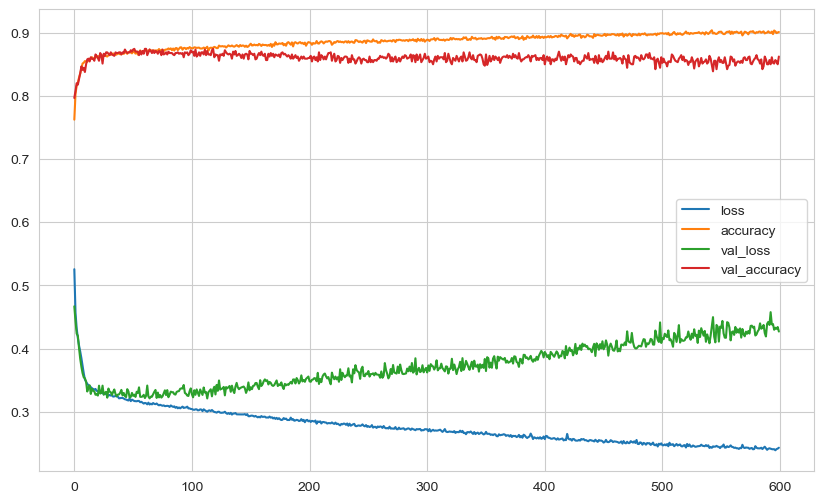

In [35]:
loss_df.plot();

In [36]:
# modelimizin overfittinge gittiği çok ragat bir şekilde gözüküyor loss val_loss'u karşılaştırdığımızda.

In [37]:
model.evaluate(X_test, y_test, verbose=0)

[0.510727047920227, 0.8220000267028809]

In [38]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.510727047920227
accuracy :  0.8220000267028809


In [39]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


# burada predict doğrudan çalışmıyor bize olasılıklar döndürdüğü için 0.5'den yukarıda olanları 1 classına ataması için
# model.predict(X_test) > 0.5 şeklinde kullanıyoruz .

32/32 [==============================] - 0s 1ms/step
[[716  80]
 [ 98 106]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       796
           1       0.57      0.52      0.54       204

    accuracy                           0.82      1000
   macro avg       0.72      0.71      0.72      1000
weighted avg       0.82      0.82      0.82      1000



In [40]:
## modelimizin test datasında skorları yüksek ama grafikte de gördük modelimiz overfittinge gitmiş bizim bu modeli overfitinden 
## kurtarmamız gerekecek.Çünkü genelleme yapamıyor şu anda .

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [50]:
from sklearn.utils import class_weight

In [51]:
tf.keras.utils.set_random_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [52]:
model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_val, y_val), 
          batch_size=32, 
          epochs=600,
          verbose=1, 
          class_weight={0:1,1:10} )


Epoch 1/600
254/254 [==============================] - 1s 2ms/step - loss: 1.6211 - accuracy: 0.2038 - val_loss: 1.0340 - val_accuracy: 0.2033
Epoch 2/600
254/254 [==============================] - 0s 2ms/step - loss: 1.4648 - accuracy: 0.2805 - val_loss: 0.8917 - val_accuracy: 0.4322
Epoch 3/600
254/254 [==============================] - 0s 2ms/step - loss: 1.3996 - accuracy: 0.4604 - val_loss: 0.8611 - val_accuracy: 0.5167
Epoch 4/600
254/254 [==============================] - 0s 1ms/step - loss: 1.3558 - accuracy: 0.5007 - val_loss: 0.9783 - val_accuracy: 0.4322
Epoch 5/600
254/254 [==============================] - 0s 1ms/step - loss: 1.3136 - accuracy: 0.5259 - val_loss: 0.9196 - val_accuracy: 0.4978
Epoch 6/600
254/254 [==============================] - 0s 1ms/step - loss: 1.2695 - accuracy: 0.5663 - val_loss: 0.8241 - val_accuracy: 0.5522
Epoch 7/600
254/254 [==============================] - 0s 1ms/step - loss: 1.2420 - accuracy: 0.5894 - val_loss: 0.8753 - val_accuracy: 0.5411

Epoch 58/600
254/254 [==============================] - 0s 2ms/step - loss: 1.0607 - accuracy: 0.6667 - val_loss: 0.6193 - val_accuracy: 0.6811
Epoch 59/600
254/254 [==============================] - 0s 2ms/step - loss: 1.0550 - accuracy: 0.6747 - val_loss: 0.7665 - val_accuracy: 0.6044
Epoch 60/600
254/254 [==============================] - 0s 1ms/step - loss: 1.0555 - accuracy: 0.6660 - val_loss: 0.5949 - val_accuracy: 0.6933
Epoch 61/600
254/254 [==============================] - 0s 2ms/step - loss: 1.0607 - accuracy: 0.6700 - val_loss: 0.6263 - val_accuracy: 0.6744
Epoch 62/600
254/254 [==============================] - 0s 1ms/step - loss: 1.0555 - accuracy: 0.6710 - val_loss: 0.7647 - val_accuracy: 0.6144
Epoch 63/600
254/254 [==============================] - 0s 2ms/step - loss: 1.0486 - accuracy: 0.6705 - val_loss: 0.6490 - val_accuracy: 0.6722
Epoch 64/600
254/254 [==============================] - 0s 2ms/step - loss: 1.0586 - accuracy: 0.6707 - val_loss: 0.7131 - val_accuracy:

Epoch 115/600
254/254 [==============================] - 0s 2ms/step - loss: 0.9857 - accuracy: 0.7037 - val_loss: 0.6161 - val_accuracy: 0.7011
Epoch 116/600
254/254 [==============================] - 0s 2ms/step - loss: 0.9990 - accuracy: 0.7005 - val_loss: 0.6835 - val_accuracy: 0.6678
Epoch 117/600
254/254 [==============================] - 0s 2ms/step - loss: 0.9925 - accuracy: 0.6960 - val_loss: 0.5866 - val_accuracy: 0.7111
Epoch 118/600
254/254 [==============================] - 0s 1ms/step - loss: 0.9947 - accuracy: 0.6999 - val_loss: 0.7978 - val_accuracy: 0.6122
Epoch 119/600
254/254 [==============================] - 0s 1ms/step - loss: 0.9821 - accuracy: 0.7060 - val_loss: 0.8163 - val_accuracy: 0.5933
Epoch 120/600
254/254 [==============================] - 0s 1ms/step - loss: 0.9889 - accuracy: 0.6925 - val_loss: 0.6012 - val_accuracy: 0.7067
Epoch 121/600
254/254 [==============================] - 0s 1ms/step - loss: 0.9847 - accuracy: 0.7035 - val_loss: 0.6054 - val_ac

254/254 [==============================] - 0s 2ms/step - loss: 0.9406 - accuracy: 0.7216 - val_loss: 0.7626 - val_accuracy: 0.6300
Epoch 172/600
254/254 [==============================] - 0s 2ms/step - loss: 0.9313 - accuracy: 0.7230 - val_loss: 0.7150 - val_accuracy: 0.6600
Epoch 173/600
254/254 [==============================] - 0s 2ms/step - loss: 0.9325 - accuracy: 0.7210 - val_loss: 0.7601 - val_accuracy: 0.6556
Epoch 174/600
254/254 [==============================] - 0s 2ms/step - loss: 0.9303 - accuracy: 0.7223 - val_loss: 0.6848 - val_accuracy: 0.6756
Epoch 175/600
254/254 [==============================] - 0s 2ms/step - loss: 0.9313 - accuracy: 0.7222 - val_loss: 0.6773 - val_accuracy: 0.6689
Epoch 176/600
254/254 [==============================] - 0s 2ms/step - loss: 0.9253 - accuracy: 0.7248 - val_loss: 0.7093 - val_accuracy: 0.6678
Epoch 177/600
254/254 [==============================] - 0s 2ms/step - loss: 0.9239 - accuracy: 0.7216 - val_loss: 0.6144 - val_accuracy: 0.7100

254/254 [==============================] - 0s 2ms/step - loss: 0.8796 - accuracy: 0.7388 - val_loss: 0.7995 - val_accuracy: 0.6433
Epoch 228/600
254/254 [==============================] - 0s 2ms/step - loss: 0.8846 - accuracy: 0.7381 - val_loss: 0.6773 - val_accuracy: 0.6922
Epoch 229/600
254/254 [==============================] - 0s 2ms/step - loss: 0.8778 - accuracy: 0.7436 - val_loss: 0.6728 - val_accuracy: 0.6878
Epoch 230/600
254/254 [==============================] - 0s 2ms/step - loss: 0.8810 - accuracy: 0.7410 - val_loss: 0.6765 - val_accuracy: 0.6778
Epoch 231/600
254/254 [==============================] - 0s 2ms/step - loss: 0.8842 - accuracy: 0.7407 - val_loss: 0.6318 - val_accuracy: 0.7089
Epoch 232/600
254/254 [==============================] - 0s 2ms/step - loss: 0.8811 - accuracy: 0.7370 - val_loss: 0.6965 - val_accuracy: 0.6700
Epoch 233/600
254/254 [==============================] - 0s 1ms/step - loss: 0.8775 - accuracy: 0.7425 - val_loss: 0.6755 - val_accuracy: 0.6911

254/254 [==============================] - 0s 2ms/step - loss: 0.8372 - accuracy: 0.7517 - val_loss: 0.7186 - val_accuracy: 0.6711
Epoch 284/600
254/254 [==============================] - 0s 2ms/step - loss: 0.8413 - accuracy: 0.7535 - val_loss: 0.6792 - val_accuracy: 0.7100
Epoch 285/600
254/254 [==============================] - 0s 2ms/step - loss: 0.8383 - accuracy: 0.7563 - val_loss: 0.6869 - val_accuracy: 0.6911
Epoch 286/600
254/254 [==============================] - 0s 2ms/step - loss: 0.8563 - accuracy: 0.7460 - val_loss: 0.7307 - val_accuracy: 0.6878
Epoch 287/600
254/254 [==============================] - 0s 2ms/step - loss: 0.8420 - accuracy: 0.7517 - val_loss: 0.6284 - val_accuracy: 0.7333
Epoch 288/600
254/254 [==============================] - 0s 2ms/step - loss: 0.8427 - accuracy: 0.7525 - val_loss: 0.5971 - val_accuracy: 0.7422
Epoch 289/600
254/254 [==============================] - 0s 2ms/step - loss: 0.8354 - accuracy: 0.7549 - val_loss: 0.5867 - val_accuracy: 0.7500

254/254 [==============================] - 0s 2ms/step - loss: 0.8054 - accuracy: 0.7679 - val_loss: 0.7776 - val_accuracy: 0.6811
Epoch 340/600
254/254 [==============================] - 0s 2ms/step - loss: 0.8111 - accuracy: 0.7644 - val_loss: 0.7639 - val_accuracy: 0.6900
Epoch 341/600
254/254 [==============================] - 0s 2ms/step - loss: 0.8087 - accuracy: 0.7647 - val_loss: 0.7013 - val_accuracy: 0.7122
Epoch 342/600
254/254 [==============================] - 0s 2ms/step - loss: 0.8022 - accuracy: 0.7649 - val_loss: 0.7112 - val_accuracy: 0.7000
Epoch 343/600
254/254 [==============================] - 0s 2ms/step - loss: 0.8079 - accuracy: 0.7641 - val_loss: 0.6342 - val_accuracy: 0.7311
Epoch 344/600
254/254 [==============================] - 0s 2ms/step - loss: 0.8092 - accuracy: 0.7664 - val_loss: 0.6883 - val_accuracy: 0.7156
Epoch 345/600
254/254 [==============================] - 0s 2ms/step - loss: 0.8104 - accuracy: 0.7674 - val_loss: 0.7137 - val_accuracy: 0.6989

254/254 [==============================] - 0s 2ms/step - loss: 0.7816 - accuracy: 0.7762 - val_loss: 0.7431 - val_accuracy: 0.7022
Epoch 396/600
254/254 [==============================] - 0s 2ms/step - loss: 0.7762 - accuracy: 0.7735 - val_loss: 0.9091 - val_accuracy: 0.6544
Epoch 397/600
254/254 [==============================] - 0s 2ms/step - loss: 0.7773 - accuracy: 0.7758 - val_loss: 0.7907 - val_accuracy: 0.6989
Epoch 398/600
254/254 [==============================] - 0s 2ms/step - loss: 0.7895 - accuracy: 0.7685 - val_loss: 0.7003 - val_accuracy: 0.7156
Epoch 399/600
254/254 [==============================] - 0s 2ms/step - loss: 0.7851 - accuracy: 0.7774 - val_loss: 0.7433 - val_accuracy: 0.7011
Epoch 400/600
254/254 [==============================] - 0s 1ms/step - loss: 0.7929 - accuracy: 0.7665 - val_loss: 0.7513 - val_accuracy: 0.7000
Epoch 401/600
254/254 [==============================] - 0s 2ms/step - loss: 0.7778 - accuracy: 0.7777 - val_loss: 0.7020 - val_accuracy: 0.7311

254/254 [==============================] - 0s 2ms/step - loss: 0.7684 - accuracy: 0.7788 - val_loss: 0.7984 - val_accuracy: 0.6944
Epoch 452/600
254/254 [==============================] - 0s 1ms/step - loss: 0.7550 - accuracy: 0.7809 - val_loss: 0.7248 - val_accuracy: 0.7144
Epoch 453/600
254/254 [==============================] - 0s 2ms/step - loss: 0.7725 - accuracy: 0.7802 - val_loss: 0.7577 - val_accuracy: 0.7056
Epoch 454/600
254/254 [==============================] - 0s 2ms/step - loss: 0.7766 - accuracy: 0.7764 - val_loss: 0.7144 - val_accuracy: 0.7189
Epoch 455/600
254/254 [==============================] - 0s 2ms/step - loss: 0.7502 - accuracy: 0.7817 - val_loss: 0.7026 - val_accuracy: 0.7200
Epoch 456/600
254/254 [==============================] - 0s 2ms/step - loss: 0.7692 - accuracy: 0.7805 - val_loss: 0.8029 - val_accuracy: 0.7033
Epoch 457/600
254/254 [==============================] - 0s 2ms/step - loss: 0.7610 - accuracy: 0.7809 - val_loss: 0.7750 - val_accuracy: 0.6978

254/254 [==============================] - 1s 2ms/step - loss: 0.7461 - accuracy: 0.7868 - val_loss: 0.8160 - val_accuracy: 0.6922
Epoch 508/600
254/254 [==============================] - 0s 2ms/step - loss: 0.7495 - accuracy: 0.7870 - val_loss: 0.8074 - val_accuracy: 0.6878
Epoch 509/600
254/254 [==============================] - 0s 2ms/step - loss: 0.7512 - accuracy: 0.7851 - val_loss: 0.7097 - val_accuracy: 0.7144
Epoch 510/600
254/254 [==============================] - 0s 2ms/step - loss: 0.7477 - accuracy: 0.7878 - val_loss: 0.7779 - val_accuracy: 0.6978
Epoch 511/600
254/254 [==============================] - 0s 2ms/step - loss: 0.7540 - accuracy: 0.7825 - val_loss: 0.7082 - val_accuracy: 0.7311
Epoch 512/600
254/254 [==============================] - 0s 2ms/step - loss: 0.7410 - accuracy: 0.7916 - val_loss: 0.8047 - val_accuracy: 0.7000
Epoch 513/600
254/254 [==============================] - 0s 2ms/step - loss: 0.7479 - accuracy: 0.7802 - val_loss: 0.6683 - val_accuracy: 0.7489

254/254 [==============================] - 0s 2ms/step - loss: 0.7430 - accuracy: 0.7872 - val_loss: 0.7744 - val_accuracy: 0.7067
Epoch 564/600
254/254 [==============================] - 0s 2ms/step - loss: 0.7338 - accuracy: 0.7904 - val_loss: 0.7932 - val_accuracy: 0.7211
Epoch 565/600
254/254 [==============================] - 0s 2ms/step - loss: 0.7206 - accuracy: 0.7909 - val_loss: 0.7658 - val_accuracy: 0.7200
Epoch 566/600
254/254 [==============================] - 0s 2ms/step - loss: 0.7226 - accuracy: 0.7931 - val_loss: 0.7513 - val_accuracy: 0.7156
Epoch 567/600
254/254 [==============================] - 0s 2ms/step - loss: 0.7353 - accuracy: 0.7940 - val_loss: 0.7787 - val_accuracy: 0.7144
Epoch 568/600
254/254 [==============================] - 0s 2ms/step - loss: 0.7381 - accuracy: 0.7877 - val_loss: 0.7403 - val_accuracy: 0.7189
Epoch 569/600
254/254 [==============================] - 0s 2ms/step - loss: 0.7375 - accuracy: 0.7910 - val_loss: 0.7053 - val_accuracy: 0.7422

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [53]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.621,0.204,1.034,0.203
1,1.465,0.280,0.892,0.432
2,1.400,0.460,0.861,0.517
3,1.356,0.501,0.978,0.432
4,1.314,0.526,0.920,0.498


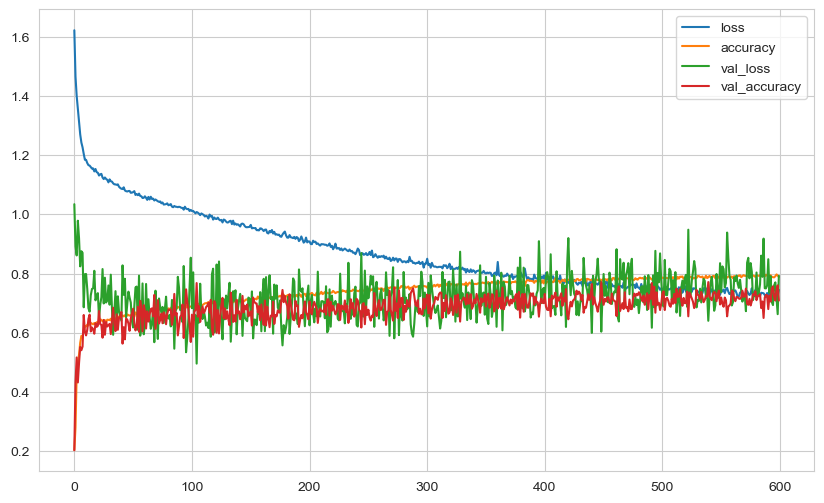

In [54]:
loss_df.plot();

In [55]:
model.evaluate(X_test, y_test, verbose=0)

[0.8854266405105591, 0.6880000233650208]

In [56]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.8854266405105591
accuracy :  0.6880000233650208


In [57]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


# burada predict doğrudan çalışmıyor bize olasılıklar döndürdüğü için 0.5'den yukarıda olanları 1 classına ataması için
# model.predict(X_test) > 0.5 şeklinde kullanıyoruz .

32/32 [==============================] - 0s 1ms/step
[[530 266]
 [ 46 158]]
              precision    recall  f1-score   support

           0       0.92      0.67      0.77       796
           1       0.37      0.77      0.50       204

    accuracy                           0.69      1000
   macro avg       0.65      0.72      0.64      1000
weighted avg       0.81      0.69      0.72      1000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [43]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## biz eğer bir optimizer'ın default learnig rate'ini değiştirmek istiyorsak tensorflow.keras.optimizers'dan
## hangi optimizerın learning rate'ini değiştireceksek önce onu import ediyoruz.

In [60]:
tf.keras.utils.set_random_seed(seed)


model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate=  0.002)

# optimizer'ı compile'a string olarak verdiğimizde "adam" gibi ; bu default learning rate kullanacağım demektir bunu değiştirmek
# istiyorsak opt = Adam(learning_rate=  0.005) bu şekilde tanımlayıp içerisine istediğimiz lr oranını yazıp
# ardından compile satırına  bunu tanımlıyoruz :

model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [61]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=600,
    verbose=1,
    class_weight={0:1,1:10} 
    
)



Epoch 1/600
254/254 [==============================] - 1s 2ms/step - loss: 1.5643 - accuracy: 0.2038 - val_loss: 1.0776 - val_accuracy: 0.2089
Epoch 2/600
254/254 [==============================] - 0s 2ms/step - loss: 1.3931 - accuracy: 0.4477 - val_loss: 0.8086 - val_accuracy: 0.5489
Epoch 3/600
254/254 [==============================] - 0s 2ms/step - loss: 1.3157 - accuracy: 0.5467 - val_loss: 0.6574 - val_accuracy: 0.6911
Epoch 4/600
254/254 [==============================] - 0s 1ms/step - loss: 1.2515 - accuracy: 0.5858 - val_loss: 0.8365 - val_accuracy: 0.5478
Epoch 5/600
254/254 [==============================] - 0s 1ms/step - loss: 1.2182 - accuracy: 0.6062 - val_loss: 0.7635 - val_accuracy: 0.6111
Epoch 6/600
254/254 [==============================] - 0s 1ms/step - loss: 1.2064 - accuracy: 0.6143 - val_loss: 0.6782 - val_accuracy: 0.6389
Epoch 7/600
254/254 [==============================] - 0s 1ms/step - loss: 1.1969 - accuracy: 0.6196 - val_loss: 0.8423 - val_accuracy: 0.5522

Epoch 58/600
254/254 [==============================] - 0s 1ms/step - loss: 1.0077 - accuracy: 0.6859 - val_loss: 0.5979 - val_accuracy: 0.7078
Epoch 59/600
254/254 [==============================] - 0s 1ms/step - loss: 1.0037 - accuracy: 0.6991 - val_loss: 0.6922 - val_accuracy: 0.6422
Epoch 60/600
254/254 [==============================] - 0s 1ms/step - loss: 1.0024 - accuracy: 0.6857 - val_loss: 0.5744 - val_accuracy: 0.7189
Epoch 61/600
254/254 [==============================] - 0s 1ms/step - loss: 1.0088 - accuracy: 0.6881 - val_loss: 0.6156 - val_accuracy: 0.6933
Epoch 62/600
254/254 [==============================] - 0s 1ms/step - loss: 1.0030 - accuracy: 0.6905 - val_loss: 0.7128 - val_accuracy: 0.6533
Epoch 63/600
254/254 [==============================] - 0s 1ms/step - loss: 0.9948 - accuracy: 0.6911 - val_loss: 0.5846 - val_accuracy: 0.7078
Epoch 64/600
254/254 [==============================] - 0s 1ms/step - loss: 1.0050 - accuracy: 0.6895 - val_loss: 0.6711 - val_accuracy:

Epoch 115/600
254/254 [==============================] - 0s 2ms/step - loss: 0.9025 - accuracy: 0.7158 - val_loss: 0.7050 - val_accuracy: 0.6544
Epoch 116/600
254/254 [==============================] - 0s 2ms/step - loss: 0.9202 - accuracy: 0.7123 - val_loss: 0.7062 - val_accuracy: 0.6556
Epoch 117/600
254/254 [==============================] - 0s 2ms/step - loss: 0.9053 - accuracy: 0.7178 - val_loss: 0.5715 - val_accuracy: 0.7267
Epoch 118/600
254/254 [==============================] - 0s 1ms/step - loss: 0.9117 - accuracy: 0.7159 - val_loss: 0.7134 - val_accuracy: 0.6489
Epoch 119/600
254/254 [==============================] - 0s 1ms/step - loss: 0.9029 - accuracy: 0.7172 - val_loss: 0.8029 - val_accuracy: 0.6144
Epoch 120/600
254/254 [==============================] - 0s 2ms/step - loss: 0.9137 - accuracy: 0.7078 - val_loss: 0.6231 - val_accuracy: 0.7033
Epoch 121/600
254/254 [==============================] - 0s 2ms/step - loss: 0.8949 - accuracy: 0.7212 - val_loss: 0.5926 - val_ac

254/254 [==============================] - 0s 2ms/step - loss: 0.8550 - accuracy: 0.7306 - val_loss: 0.7714 - val_accuracy: 0.6556
Epoch 172/600
254/254 [==============================] - 0s 1ms/step - loss: 0.8401 - accuracy: 0.7364 - val_loss: 0.6369 - val_accuracy: 0.7167
Epoch 173/600
254/254 [==============================] - 0s 2ms/step - loss: 0.8569 - accuracy: 0.7274 - val_loss: 0.7003 - val_accuracy: 0.6889
Epoch 174/600
254/254 [==============================] - 0s 2ms/step - loss: 0.8439 - accuracy: 0.7332 - val_loss: 0.6700 - val_accuracy: 0.6967
Epoch 175/600
254/254 [==============================] - 0s 2ms/step - loss: 0.8321 - accuracy: 0.7367 - val_loss: 0.6868 - val_accuracy: 0.6789
Epoch 176/600
254/254 [==============================] - 0s 1ms/step - loss: 0.8580 - accuracy: 0.7290 - val_loss: 0.6452 - val_accuracy: 0.7067
Epoch 177/600
254/254 [==============================] - 0s 2ms/step - loss: 0.8348 - accuracy: 0.7346 - val_loss: 0.6121 - val_accuracy: 0.7211

254/254 [==============================] - 0s 1ms/step - loss: 0.8005 - accuracy: 0.7502 - val_loss: 0.7319 - val_accuracy: 0.6844
Epoch 228/600
254/254 [==============================] - 0s 2ms/step - loss: 0.8031 - accuracy: 0.7472 - val_loss: 0.7065 - val_accuracy: 0.6911
Epoch 229/600
254/254 [==============================] - 0s 2ms/step - loss: 0.8009 - accuracy: 0.7528 - val_loss: 0.6881 - val_accuracy: 0.7156
Epoch 230/600
254/254 [==============================] - 0s 1ms/step - loss: 0.7975 - accuracy: 0.7496 - val_loss: 0.6986 - val_accuracy: 0.6800
Epoch 231/600
254/254 [==============================] - 0s 2ms/step - loss: 0.8069 - accuracy: 0.7541 - val_loss: 0.6433 - val_accuracy: 0.7211
Epoch 232/600
254/254 [==============================] - 0s 2ms/step - loss: 0.8241 - accuracy: 0.7386 - val_loss: 0.6917 - val_accuracy: 0.7089
Epoch 233/600
254/254 [==============================] - 0s 2ms/step - loss: 0.8380 - accuracy: 0.7409 - val_loss: 0.7644 - val_accuracy: 0.6678

254/254 [==============================] - 0s 2ms/step - loss: 0.7868 - accuracy: 0.7553 - val_loss: 0.7190 - val_accuracy: 0.6956
Epoch 284/600
254/254 [==============================] - 0s 2ms/step - loss: 0.7613 - accuracy: 0.7636 - val_loss: 0.7176 - val_accuracy: 0.7189
Epoch 285/600
254/254 [==============================] - 0s 2ms/step - loss: 0.7827 - accuracy: 0.7602 - val_loss: 0.6366 - val_accuracy: 0.7256
Epoch 286/600
254/254 [==============================] - 0s 2ms/step - loss: 0.7721 - accuracy: 0.7584 - val_loss: 0.6631 - val_accuracy: 0.7222
Epoch 287/600
254/254 [==============================] - 0s 1ms/step - loss: 0.7618 - accuracy: 0.7602 - val_loss: 0.6419 - val_accuracy: 0.7233
Epoch 288/600
254/254 [==============================] - 0s 2ms/step - loss: 0.7542 - accuracy: 0.7665 - val_loss: 0.6476 - val_accuracy: 0.7411
Epoch 289/600
254/254 [==============================] - 0s 2ms/step - loss: 0.7687 - accuracy: 0.7615 - val_loss: 0.6980 - val_accuracy: 0.7078

254/254 [==============================] - 0s 1ms/step - loss: 0.7363 - accuracy: 0.7758 - val_loss: 0.7418 - val_accuracy: 0.6978
Epoch 340/600
254/254 [==============================] - 0s 1ms/step - loss: 0.7458 - accuracy: 0.7696 - val_loss: 0.7671 - val_accuracy: 0.6900
Epoch 341/600
254/254 [==============================] - 0s 1ms/step - loss: 0.7475 - accuracy: 0.7722 - val_loss: 0.6755 - val_accuracy: 0.7422
Epoch 342/600
254/254 [==============================] - 0s 1ms/step - loss: 0.7188 - accuracy: 0.7789 - val_loss: 0.6630 - val_accuracy: 0.7489
Epoch 343/600
254/254 [==============================] - 0s 2ms/step - loss: 0.7273 - accuracy: 0.7799 - val_loss: 0.7257 - val_accuracy: 0.7322
Epoch 344/600
254/254 [==============================] - 0s 2ms/step - loss: 0.7430 - accuracy: 0.7751 - val_loss: 0.6981 - val_accuracy: 0.7311
Epoch 345/600
254/254 [==============================] - 0s 1ms/step - loss: 0.7423 - accuracy: 0.7748 - val_loss: 0.7002 - val_accuracy: 0.7156

254/254 [==============================] - 0s 2ms/step - loss: 0.7060 - accuracy: 0.7864 - val_loss: 0.7565 - val_accuracy: 0.7200
Epoch 396/600
254/254 [==============================] - 0s 2ms/step - loss: 0.7057 - accuracy: 0.7840 - val_loss: 0.7209 - val_accuracy: 0.7389
Epoch 397/600
254/254 [==============================] - 0s 2ms/step - loss: 0.7074 - accuracy: 0.7873 - val_loss: 0.7243 - val_accuracy: 0.7200
Epoch 398/600
254/254 [==============================] - 0s 2ms/step - loss: 0.6995 - accuracy: 0.7894 - val_loss: 0.7117 - val_accuracy: 0.7422
Epoch 399/600
254/254 [==============================] - 0s 2ms/step - loss: 0.7032 - accuracy: 0.7900 - val_loss: 0.7370 - val_accuracy: 0.7189
Epoch 400/600
254/254 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.7836 - val_loss: 0.8597 - val_accuracy: 0.6889
Epoch 401/600
254/254 [==============================] - 0s 2ms/step - loss: 0.7075 - accuracy: 0.7828 - val_loss: 0.7019 - val_accuracy: 0.7356

254/254 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.7927 - val_loss: 0.7360 - val_accuracy: 0.7333
Epoch 452/600
254/254 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.7959 - val_loss: 0.7665 - val_accuracy: 0.7144
Epoch 453/600
254/254 [==============================] - 0s 1ms/step - loss: 0.7027 - accuracy: 0.7915 - val_loss: 0.8320 - val_accuracy: 0.6744
Epoch 454/600
254/254 [==============================] - 0s 1ms/step - loss: 0.6857 - accuracy: 0.7958 - val_loss: 0.7758 - val_accuracy: 0.7200
Epoch 455/600
254/254 [==============================] - 0s 1ms/step - loss: 0.6836 - accuracy: 0.7994 - val_loss: 0.7637 - val_accuracy: 0.7222
Epoch 456/600
254/254 [==============================] - 0s 1ms/step - loss: 0.6735 - accuracy: 0.7973 - val_loss: 0.8258 - val_accuracy: 0.7133
Epoch 457/600
254/254 [==============================] - 0s 1ms/step - loss: 0.6719 - accuracy: 0.8007 - val_loss: 0.8427 - val_accuracy: 0.6889

254/254 [==============================] - 0s 1ms/step - loss: 0.6698 - accuracy: 0.8002 - val_loss: 0.8515 - val_accuracy: 0.7100
Epoch 508/600
254/254 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.7986 - val_loss: 0.8327 - val_accuracy: 0.7189
Epoch 509/600
254/254 [==============================] - 0s 2ms/step - loss: 0.6627 - accuracy: 0.8032 - val_loss: 0.7695 - val_accuracy: 0.7344
Epoch 510/600
254/254 [==============================] - 0s 2ms/step - loss: 0.6581 - accuracy: 0.8009 - val_loss: 0.7461 - val_accuracy: 0.7311
Epoch 511/600
254/254 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.7979 - val_loss: 0.8225 - val_accuracy: 0.7289
Epoch 512/600
254/254 [==============================] - 0s 2ms/step - loss: 0.6629 - accuracy: 0.8022 - val_loss: 0.8091 - val_accuracy: 0.7289
Epoch 513/600
254/254 [==============================] - 0s 1ms/step - loss: 0.6648 - accuracy: 0.7994 - val_loss: 0.7685 - val_accuracy: 0.7233

254/254 [==============================] - 0s 2ms/step - loss: 0.6485 - accuracy: 0.8080 - val_loss: 0.8020 - val_accuracy: 0.7300
Epoch 564/600
254/254 [==============================] - 0s 2ms/step - loss: 0.6364 - accuracy: 0.8094 - val_loss: 0.8190 - val_accuracy: 0.7378
Epoch 565/600
254/254 [==============================] - 0s 1ms/step - loss: 0.6344 - accuracy: 0.8120 - val_loss: 0.7921 - val_accuracy: 0.7278
Epoch 566/600
254/254 [==============================] - 0s 1ms/step - loss: 0.6310 - accuracy: 0.8142 - val_loss: 0.8119 - val_accuracy: 0.7289
Epoch 567/600
254/254 [==============================] - 0s 2ms/step - loss: 0.6396 - accuracy: 0.8157 - val_loss: 0.8414 - val_accuracy: 0.7167
Epoch 568/600
254/254 [==============================] - 0s 2ms/step - loss: 0.6457 - accuracy: 0.8078 - val_loss: 0.8413 - val_accuracy: 0.7189
Epoch 569/600
254/254 [==============================] - 0s 2ms/step - loss: 0.6471 - accuracy: 0.8081 - val_loss: 0.8664 - val_accuracy: 0.7078

In [62]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.564,0.204,1.078,0.209
1,1.393,0.448,0.809,0.549
2,1.316,0.547,0.657,0.691
3,1.252,0.586,0.836,0.548
4,1.218,0.606,0.763,0.611


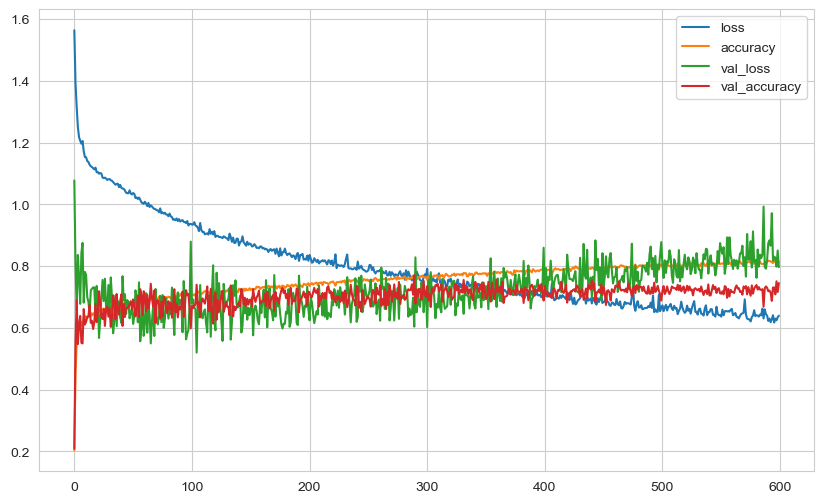

In [63]:
loss_df.plot() #subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10)
plt.show()

In [64]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.9654272198677063
accuracy :  0.7250000238418579


In [65]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[579 217]
 [ 58 146]]
              precision    recall  f1-score   support

           0       0.91      0.73      0.81       796
           1       0.40      0.72      0.51       204

    accuracy                           0.73      1000
   macro avg       0.66      0.72      0.66      1000
weighted avg       0.81      0.72      0.75      1000



### Add Dropout Layer

In [66]:
from tensorflow.keras.layers import Dropout

# ---> Dropout'ta bir regularization tekniğidir.
# Dropout, ağın belirli bir kısmını her İTERASYONDA rastgele seçerek "eğitim" sırasında devre dışı bırakır.Yukarıda şekilde 
# görüleceği gibi. biz modelimizin datayı ezberlemesini engellemek isteriz datadaki kuralları öğrenmesini datanın yapısını 
# anlamasını isteriz ama model datayı takıntı haline getirirse yani ezberlerse bu dropout yöntemi de kullanabileceğimiz bir 
# regularization tekniğidir.


# Dropout'u bir layer gibi modelimize ekleyeceğiz aşağıdaki örnekte olduğu gibi. 
# model.add(Dropout(0.2)) demek her iterasyonda nöronların MAX  %20 'si kapanacak demektir ve bu her iterasyonda RASTGELE olur

In [67]:
tf.keras.utils.set_random_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [68]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=600,
    verbose=1,
    class_weight={0:1,1:10} 
)

Epoch 1/600
254/254 [==============================] - 2s 3ms/step - loss: 1.7964 - accuracy: 0.2215 - val_loss: 0.8454 - val_accuracy: 0.2033
Epoch 2/600
254/254 [==============================] - 1s 2ms/step - loss: 1.7130 - accuracy: 0.2047 - val_loss: 0.8892 - val_accuracy: 0.2033
Epoch 3/600
254/254 [==============================] - 1s 2ms/step - loss: 1.6587 - accuracy: 0.2057 - val_loss: 0.9302 - val_accuracy: 0.2033
Epoch 4/600
254/254 [==============================] - 1s 2ms/step - loss: 1.6493 - accuracy: 0.2119 - val_loss: 0.9158 - val_accuracy: 0.2033
Epoch 5/600
254/254 [==============================] - 1s 2ms/step - loss: 1.6195 - accuracy: 0.2112 - val_loss: 0.9336 - val_accuracy: 0.2033
Epoch 6/600
254/254 [==============================] - 1s 2ms/step - loss: 1.6027 - accuracy: 0.2204 - val_loss: 0.9305 - val_accuracy: 0.2033
Epoch 7/600
254/254 [==============================] - 1s 2ms/step - loss: 1.5718 - accuracy: 0.2364 - val_loss: 0.9141 - val_accuracy: 0.2033

Epoch 58/600
254/254 [==============================] - 0s 2ms/step - loss: 1.3016 - accuracy: 0.4959 - val_loss: 0.7619 - val_accuracy: 0.6078
Epoch 59/600
254/254 [==============================] - 1s 2ms/step - loss: 1.3110 - accuracy: 0.5077 - val_loss: 0.7396 - val_accuracy: 0.6333
Epoch 60/600
254/254 [==============================] - 1s 2ms/step - loss: 1.2931 - accuracy: 0.5025 - val_loss: 0.7207 - val_accuracy: 0.6311
Epoch 61/600
254/254 [==============================] - 0s 2ms/step - loss: 1.3010 - accuracy: 0.4937 - val_loss: 0.7315 - val_accuracy: 0.6489
Epoch 62/600
254/254 [==============================] - 0s 2ms/step - loss: 1.3144 - accuracy: 0.4831 - val_loss: 0.7808 - val_accuracy: 0.6022
Epoch 63/600
254/254 [==============================] - 0s 2ms/step - loss: 1.3037 - accuracy: 0.4967 - val_loss: 0.7471 - val_accuracy: 0.6144
Epoch 64/600
254/254 [==============================] - 0s 2ms/step - loss: 1.3108 - accuracy: 0.5015 - val_loss: 0.7126 - val_accuracy:

Epoch 115/600
254/254 [==============================] - 0s 2ms/step - loss: 1.2767 - accuracy: 0.5025 - val_loss: 0.7461 - val_accuracy: 0.6211
Epoch 116/600
254/254 [==============================] - 0s 2ms/step - loss: 1.2795 - accuracy: 0.5231 - val_loss: 0.8067 - val_accuracy: 0.5856
Epoch 117/600
254/254 [==============================] - 0s 2ms/step - loss: 1.2853 - accuracy: 0.4978 - val_loss: 0.7900 - val_accuracy: 0.6122
Epoch 118/600
254/254 [==============================] - 0s 2ms/step - loss: 1.2913 - accuracy: 0.5048 - val_loss: 0.7706 - val_accuracy: 0.5911
Epoch 119/600
254/254 [==============================] - 1s 2ms/step - loss: 1.2618 - accuracy: 0.4991 - val_loss: 0.7680 - val_accuracy: 0.6067
Epoch 120/600
254/254 [==============================] - 1s 2ms/step - loss: 1.2950 - accuracy: 0.4928 - val_loss: 0.7192 - val_accuracy: 0.6444
Epoch 121/600
254/254 [==============================] - 1s 2ms/step - loss: 1.2679 - accuracy: 0.5141 - val_loss: 0.7219 - val_ac

254/254 [==============================] - 0s 2ms/step - loss: 1.2718 - accuracy: 0.4978 - val_loss: 0.7150 - val_accuracy: 0.6222
Epoch 172/600
254/254 [==============================] - 0s 2ms/step - loss: 1.2705 - accuracy: 0.4874 - val_loss: 0.7080 - val_accuracy: 0.6400
Epoch 173/600
254/254 [==============================] - 0s 2ms/step - loss: 1.2701 - accuracy: 0.4842 - val_loss: 0.7541 - val_accuracy: 0.5900
Epoch 174/600
254/254 [==============================] - 0s 2ms/step - loss: 1.2822 - accuracy: 0.4870 - val_loss: 0.7458 - val_accuracy: 0.5944
Epoch 175/600
254/254 [==============================] - 0s 2ms/step - loss: 1.2915 - accuracy: 0.4717 - val_loss: 0.7264 - val_accuracy: 0.6056
Epoch 176/600
254/254 [==============================] - 0s 2ms/step - loss: 1.2756 - accuracy: 0.4728 - val_loss: 0.7448 - val_accuracy: 0.6111
Epoch 177/600
254/254 [==============================] - 0s 2ms/step - loss: 1.2746 - accuracy: 0.4884 - val_loss: 0.7288 - val_accuracy: 0.6156

254/254 [==============================] - 1s 2ms/step - loss: 1.2686 - accuracy: 0.5041 - val_loss: 0.7480 - val_accuracy: 0.6178
Epoch 228/600
254/254 [==============================] - 0s 2ms/step - loss: 1.2747 - accuracy: 0.4760 - val_loss: 0.7002 - val_accuracy: 0.6378
Epoch 229/600
254/254 [==============================] - 1s 2ms/step - loss: 1.2705 - accuracy: 0.4848 - val_loss: 0.6941 - val_accuracy: 0.6433
Epoch 230/600
254/254 [==============================] - 1s 2ms/step - loss: 1.2606 - accuracy: 0.5021 - val_loss: 0.7534 - val_accuracy: 0.6100
Epoch 231/600
254/254 [==============================] - 1s 2ms/step - loss: 1.2523 - accuracy: 0.5017 - val_loss: 0.7117 - val_accuracy: 0.6278
Epoch 232/600
254/254 [==============================] - 0s 2ms/step - loss: 1.2847 - accuracy: 0.4996 - val_loss: 0.7299 - val_accuracy: 0.6111
Epoch 233/600
254/254 [==============================] - 0s 2ms/step - loss: 1.2559 - accuracy: 0.4763 - val_loss: 0.7052 - val_accuracy: 0.6167

254/254 [==============================] - 0s 2ms/step - loss: 1.2636 - accuracy: 0.4899 - val_loss: 0.6968 - val_accuracy: 0.6100
Epoch 284/600
254/254 [==============================] - 1s 2ms/step - loss: 1.2563 - accuracy: 0.4758 - val_loss: 0.7305 - val_accuracy: 0.6000
Epoch 285/600
254/254 [==============================] - 0s 2ms/step - loss: 1.2349 - accuracy: 0.4999 - val_loss: 0.7243 - val_accuracy: 0.6156
Epoch 286/600
254/254 [==============================] - 1s 2ms/step - loss: 1.2668 - accuracy: 0.4859 - val_loss: 0.7154 - val_accuracy: 0.6122
Epoch 287/600
254/254 [==============================] - 0s 2ms/step - loss: 1.2375 - accuracy: 0.4947 - val_loss: 0.6767 - val_accuracy: 0.6333
Epoch 288/600
254/254 [==============================] - 1s 3ms/step - loss: 1.2464 - accuracy: 0.4796 - val_loss: 0.6988 - val_accuracy: 0.6156
Epoch 289/600
254/254 [==============================] - 0s 2ms/step - loss: 1.2681 - accuracy: 0.4915 - val_loss: 0.7269 - val_accuracy: 0.6089

254/254 [==============================] - 1s 2ms/step - loss: 1.2678 - accuracy: 0.5126 - val_loss: 0.7314 - val_accuracy: 0.6200
Epoch 340/600
254/254 [==============================] - 0s 2ms/step - loss: 1.2503 - accuracy: 0.4967 - val_loss: 0.7260 - val_accuracy: 0.6189
Epoch 341/600
254/254 [==============================] - 1s 2ms/step - loss: 1.2458 - accuracy: 0.4953 - val_loss: 0.6934 - val_accuracy: 0.6311
Epoch 342/600
254/254 [==============================] - 1s 2ms/step - loss: 1.2366 - accuracy: 0.4990 - val_loss: 0.7032 - val_accuracy: 0.6500
Epoch 343/600
254/254 [==============================] - 0s 2ms/step - loss: 1.2493 - accuracy: 0.5094 - val_loss: 0.7308 - val_accuracy: 0.6233
Epoch 344/600
254/254 [==============================] - 0s 2ms/step - loss: 1.2363 - accuracy: 0.5100 - val_loss: 0.6923 - val_accuracy: 0.6522
Epoch 345/600
254/254 [==============================] - 0s 2ms/step - loss: 1.2603 - accuracy: 0.5016 - val_loss: 0.6834 - val_accuracy: 0.6322

254/254 [==============================] - 0s 2ms/step - loss: 1.2598 - accuracy: 0.4858 - val_loss: 0.7353 - val_accuracy: 0.5522
Epoch 396/600
254/254 [==============================] - 1s 2ms/step - loss: 1.2615 - accuracy: 0.4614 - val_loss: 0.6940 - val_accuracy: 0.6311
Epoch 397/600
254/254 [==============================] - 1s 2ms/step - loss: 1.2725 - accuracy: 0.4891 - val_loss: 0.6705 - val_accuracy: 0.6411
Epoch 398/600
254/254 [==============================] - 1s 3ms/step - loss: 1.2506 - accuracy: 0.4973 - val_loss: 0.6916 - val_accuracy: 0.6267
Epoch 399/600
254/254 [==============================] - 1s 2ms/step - loss: 1.2569 - accuracy: 0.5030 - val_loss: 0.6726 - val_accuracy: 0.6367
Epoch 400/600
254/254 [==============================] - 1s 2ms/step - loss: 1.2814 - accuracy: 0.4817 - val_loss: 0.7044 - val_accuracy: 0.6156
Epoch 401/600
254/254 [==============================] - 1s 2ms/step - loss: 1.2639 - accuracy: 0.5001 - val_loss: 0.6866 - val_accuracy: 0.6411

254/254 [==============================] - 0s 2ms/step - loss: 1.2565 - accuracy: 0.4981 - val_loss: 0.7244 - val_accuracy: 0.6300
Epoch 452/600
254/254 [==============================] - 1s 2ms/step - loss: 1.2684 - accuracy: 0.4831 - val_loss: 0.6927 - val_accuracy: 0.6367
Epoch 453/600
254/254 [==============================] - 1s 2ms/step - loss: 1.2615 - accuracy: 0.4933 - val_loss: 0.6913 - val_accuracy: 0.6478
Epoch 454/600
254/254 [==============================] - 1s 2ms/step - loss: 1.2395 - accuracy: 0.5062 - val_loss: 0.6826 - val_accuracy: 0.6533
Epoch 455/600
254/254 [==============================] - 1s 2ms/step - loss: 1.2419 - accuracy: 0.5191 - val_loss: 0.6961 - val_accuracy: 0.6167
Epoch 456/600
254/254 [==============================] - 1s 2ms/step - loss: 1.2522 - accuracy: 0.5141 - val_loss: 0.7052 - val_accuracy: 0.6300
Epoch 457/600
254/254 [==============================] - 1s 2ms/step - loss: 1.2442 - accuracy: 0.5096 - val_loss: 0.6976 - val_accuracy: 0.6378

254/254 [==============================] - 0s 2ms/step - loss: 1.2357 - accuracy: 0.4942 - val_loss: 0.7055 - val_accuracy: 0.6167
Epoch 508/600
254/254 [==============================] - 1s 2ms/step - loss: 1.2598 - accuracy: 0.4860 - val_loss: 0.6912 - val_accuracy: 0.6222
Epoch 509/600
254/254 [==============================] - 1s 2ms/step - loss: 1.2460 - accuracy: 0.5000 - val_loss: 0.6910 - val_accuracy: 0.6344
Epoch 510/600
254/254 [==============================] - 0s 2ms/step - loss: 1.2445 - accuracy: 0.4902 - val_loss: 0.7396 - val_accuracy: 0.5789
Epoch 511/600
254/254 [==============================] - 1s 2ms/step - loss: 1.2610 - accuracy: 0.4947 - val_loss: 0.7072 - val_accuracy: 0.6089
Epoch 512/600
254/254 [==============================] - 1s 2ms/step - loss: 1.2562 - accuracy: 0.4967 - val_loss: 0.6898 - val_accuracy: 0.6333
Epoch 513/600
254/254 [==============================] - 1s 2ms/step - loss: 1.2482 - accuracy: 0.5030 - val_loss: 0.7203 - val_accuracy: 0.6211

254/254 [==============================] - 1s 2ms/step - loss: 1.2512 - accuracy: 0.5254 - val_loss: 0.6981 - val_accuracy: 0.6489
Epoch 564/600
254/254 [==============================] - 1s 2ms/step - loss: 1.2525 - accuracy: 0.4880 - val_loss: 0.7248 - val_accuracy: 0.6067
Epoch 565/600
254/254 [==============================] - 1s 2ms/step - loss: 1.2412 - accuracy: 0.4836 - val_loss: 0.6719 - val_accuracy: 0.6344
Epoch 566/600
254/254 [==============================] - 0s 2ms/step - loss: 1.2369 - accuracy: 0.4967 - val_loss: 0.6497 - val_accuracy: 0.6544
Epoch 567/600
254/254 [==============================] - 0s 2ms/step - loss: 1.2538 - accuracy: 0.5017 - val_loss: 0.7158 - val_accuracy: 0.6133
Epoch 568/600
254/254 [==============================] - 0s 2ms/step - loss: 1.2377 - accuracy: 0.5173 - val_loss: 0.6900 - val_accuracy: 0.6378
Epoch 569/600
254/254 [==============================] - 0s 2ms/step - loss: 1.2256 - accuracy: 0.5007 - val_loss: 0.7246 - val_accuracy: 0.6078

In [69]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.796,0.221,0.845,0.203
1,1.713,0.205,0.889,0.203
2,1.659,0.206,0.930,0.203
3,1.649,0.212,0.916,0.203
4,1.619,0.211,0.934,0.203


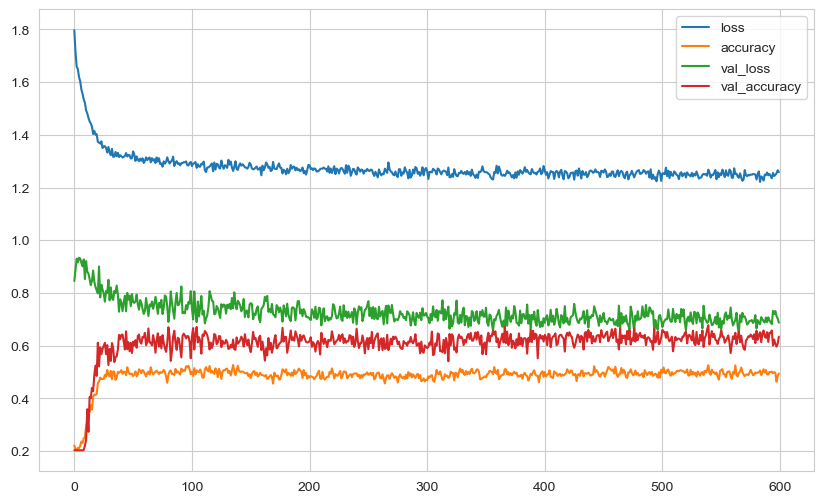

In [70]:
loss_df.plot() #subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10)
plt.show()

In [71]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.7192320823669434
accuracy :  0.6380000114440918


In [72]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[457 339]
 [ 23 181]]
              precision    recall  f1-score   support

           0       0.95      0.57      0.72       796
           1       0.35      0.89      0.50       204

    accuracy                           0.64      1000
   macro avg       0.65      0.73      0.61      1000
weighted avg       0.83      0.64      0.67      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [73]:
model = Sequential()

model.add(Dense(36, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [74]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [75]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=600,
    verbose=1,
    class_weight={0:1,1:10},
    callbacks=[early_stop]
)

Epoch 1/600
254/254 [==============================] - 1s 2ms/step - loss: 1.9082 - accuracy: 0.3579 - val_loss: 0.8714 - val_accuracy: 0.2033
Epoch 2/600
254/254 [==============================] - 0s 2ms/step - loss: 1.7597 - accuracy: 0.2167 - val_loss: 0.9126 - val_accuracy: 0.2033
Epoch 3/600
254/254 [==============================] - 0s 2ms/step - loss: 1.7008 - accuracy: 0.2084 - val_loss: 0.9406 - val_accuracy: 0.2033
Epoch 4/600
254/254 [==============================] - 0s 2ms/step - loss: 1.6777 - accuracy: 0.2084 - val_loss: 0.9399 - val_accuracy: 0.2033
Epoch 5/600
254/254 [==============================] - 0s 2ms/step - loss: 1.6560 - accuracy: 0.2117 - val_loss: 0.9700 - val_accuracy: 0.2033
Epoch 6/600
254/254 [==============================] - 0s 2ms/step - loss: 1.6370 - accuracy: 0.2167 - val_loss: 0.9651 - val_accuracy: 0.2033
Epoch 7/600
254/254 [==============================] - 0s 2ms/step - loss: 1.6308 - accuracy: 0.2200 - val_loss: 0.9642 - val_accuracy: 0.2033

In [76]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.908,0.358,0.871,0.203
1,1.760,0.217,0.913,0.203
2,1.701,0.208,0.941,0.203
3,1.678,0.208,0.940,0.203
4,1.656,0.212,0.970,0.203


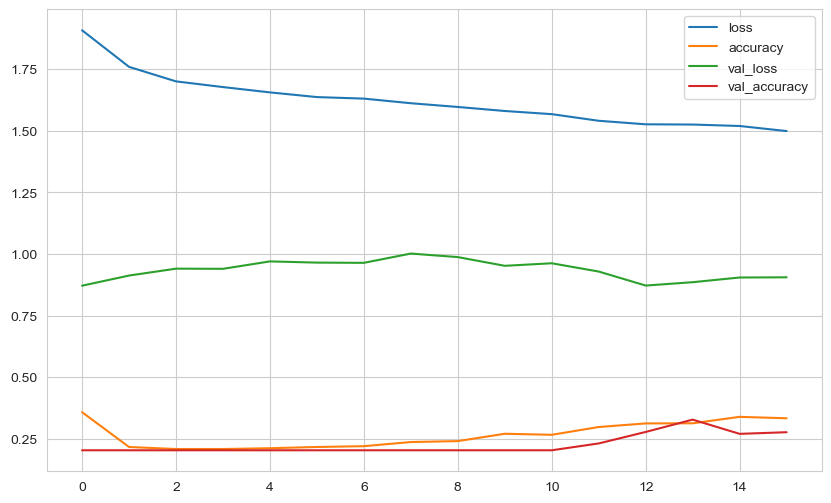

In [77]:
loss_df.plot() #subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10)
plt.show()

In [78]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.8724533319473267
accuracy :  0.20399999618530273


In [79]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[  0 796]
 [  0 204]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       796
           1       0.20      1.00      0.34       204

    accuracy                           0.20      1000
   macro avg       0.10      0.50      0.17      1000
weighted avg       0.04      0.20      0.07      1000



#### Monitor the "val_recall" as metric

In [87]:
model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [88]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=15)

In [82]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=600,
    verbose=1,
    callbacks=[early_stop])

Epoch 1/600
254/254 [==============================] - 1s 3ms/step - loss: 0.5508 - recall: 0.0418 - val_loss: 0.4822 - val_recall: 0.0000e+00
Epoch 2/600
254/254 [==============================] - 0s 2ms/step - loss: 0.4737 - recall: 0.0073 - val_loss: 0.4583 - val_recall: 0.0164
Epoch 3/600
254/254 [==============================] - 0s 1ms/step - loss: 0.4555 - recall: 0.0691 - val_loss: 0.4458 - val_recall: 0.1311
Epoch 4/600
254/254 [==============================] - 0s 2ms/step - loss: 0.4431 - recall: 0.1539 - val_loss: 0.4350 - val_recall: 0.1585
Epoch 5/600
254/254 [==============================] - 0s 2ms/step - loss: 0.4335 - recall: 0.1855 - val_loss: 0.4307 - val_recall: 0.1858
Epoch 6/600
254/254 [==============================] - 0s 2ms/step - loss: 0.4262 - recall: 0.2224 - val_loss: 0.4315 - val_recall: 0.2842
Epoch 7/600
254/254 [==============================] - 0s 2ms/step - loss: 0.4207 - recall: 0.2406 - val_loss: 0.4227 - val_recall: 0.2568
Epoch 8/600
254/254 [==

254/254 [==============================] - 0s 2ms/step - loss: 0.3366 - recall: 0.4594 - val_loss: 0.3321 - val_recall: 0.5574
Epoch 60/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3372 - recall: 0.4739 - val_loss: 0.3303 - val_recall: 0.4481
Epoch 61/600
254/254 [==============================] - 0s 1ms/step - loss: 0.3376 - recall: 0.4697 - val_loss: 0.3260 - val_recall: 0.5027
Epoch 62/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3366 - recall: 0.4594 - val_loss: 0.3256 - val_recall: 0.5191
Epoch 63/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3363 - recall: 0.4715 - val_loss: 0.3355 - val_recall: 0.4317
Epoch 64/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3369 - recall: 0.4618 - val_loss: 0.3273 - val_recall: 0.4973
Epoch 65/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3362 - recall: 0.4727 - val_loss: 0.3272 - val_recall: 0.4973
Epoch 66/600
254/254 [===========

In [83]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.551,0.042,0.482,0.000
1,0.474,0.007,0.458,0.016
2,0.455,0.069,0.446,0.131
3,0.443,0.154,0.435,0.158
4,0.434,0.185,0.431,0.186


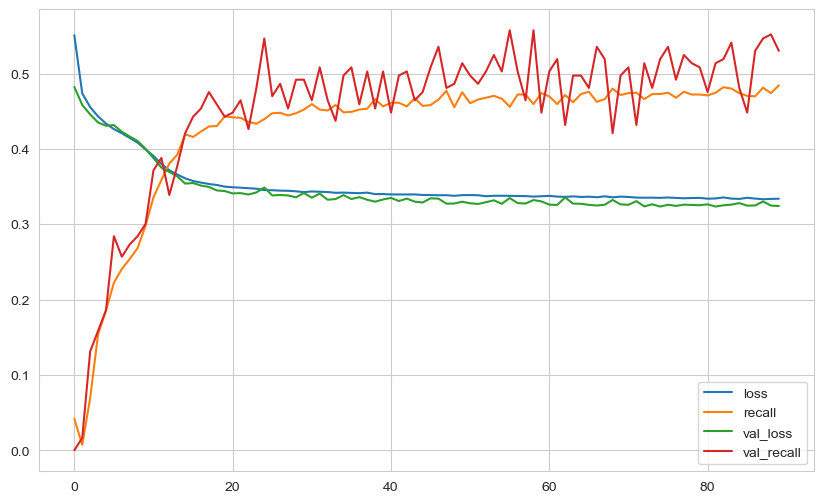

In [84]:
loss_df.plot() #subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10)
plt.show()

In [85]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.3709675967693329
recall :  0.46078431606292725


In [86]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 903us/step
[[747  49]
 [110  94]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       796
           1       0.66      0.46      0.54       204

    accuracy                           0.84      1000
   macro avg       0.76      0.70      0.72      1000
weighted avg       0.83      0.84      0.83      1000



## Optuna

In [90]:
#!pip install optuna

     -------------------------------------- 365.7/365.7 kB 1.9 MB/s eta 0:00:00
     -------------------------------------- 224.3/224.3 kB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 78.7/78.7 kB 2.2 MB/s eta 0:00:00


In [91]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.regularizers import l1, l2, L1L2
import optuna

In [92]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [93]:
trial_metric = "Accuracy"
batch_size = 64

# batch_size = 64 model biraz daha hızlı eğitilsin diye batch_size'ı 32'den 64'e çıkardık

def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 64, 128) # ilk layerda kaç tane nöron olsun 64'ten 128'e kadar dene diyoruz
    n_units2 = trial.suggest_int("n_units2", 16, 64)  # ama dikkat hepsini denemeyecek en iyiye doğru bir yönelimi olacak. 
    n_units3 = trial.suggest_int("n_units3", 16, 64)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam]) # optimizer olarak buradakileri dene
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1) 
    regularizer1 = trial.suggest_loguniform("regularizer1", 1e-5, 1e-3)
    regularizer2 = trial.suggest_loguniform("regularizer2", 1e-5, 1e-3)
    dropout = trial.suggest_categorical("dropout",[0, .3, .5])
    
    # deneyeceğimiz hyperparametrelerin uzayını belirledik.
    # modeli aynı seed'de çalıştırarak

    
    model = Sequential()
    model.add(Dense(n_units1,  
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2), 
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2), 
                    input_dim=X_train.shape[1],))
    model.add(Dropout(dropout))
    model.add(Dense(n_units2, 
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2), 
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2)))
    model.add(Dropout(dropout))
    model.add(Dense(n_units3,
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2),
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2)))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation="sigmoid"))
   



    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric]
    )
    
    
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5) # mimarinin içerisinde direk veremediğimiz bir hyperparametre-->(class_weight)
    w1 = trial.suggest_loguniform("w1", 0.01, 2) # daha var bunu fit içerisinde belirtebiliyoruz ondan dolayı burada tanımladık
                                                 # denenmesi için.
    model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=700,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    return model.evaluate(X_test, y_test, verbose=0)[1]

In [94]:
study = optuna.create_study(direction="maximize") # trial_metric = "Accuracy" olduğundan bunu maximize etmek istiyoruz.
study.optimize(objective, n_trials=15) # 15 trials denenecek istersek daha fazla da yazabiliriz.optimize edeceği :def objective
display(study.best_params)

[I 2023-05-17 16:42:24,906] A new study created in memory with name: no-name-c949aa9a-90ef-4b47-bca4-209d1bafa3e0


Restoring model weights from the end of the best epoch: 230.
Epoch 245: early stopping


[I 2023-05-17 16:43:38,075] Trial 0 finished with value: 0.7960000038146973 and parameters: {'n_units1': 125, 'n_units2': 62, 'n_units3': 34, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0002720526737873683, 'regularizer1': 3.5993604599746555e-05, 'regularizer2': 1.9119941806000105e-05, 'dropout': 0.3, 'w0': 1.2681241603568796, 'w1': 0.023638544753308934}. Best is trial 0 with value: 0.7960000038146973.


Restoring model weights from the end of the best epoch: 69.
Epoch 84: early stopping


[I 2023-05-17 16:44:02,075] Trial 1 finished with value: 0.8410000205039978 and parameters: {'n_units1': 73, 'n_units2': 36, 'n_units3': 61, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.003389006083604304, 'regularizer1': 4.089214169640454e-05, 'regularizer2': 2.004010756592817e-05, 'dropout': 0.3, 'w0': 0.3671226757237993, 'w1': 0.9044335444035262}. Best is trial 1 with value: 0.8410000205039978.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-05-17 16:44:06,444] Trial 2 finished with value: 0.20399999618530273 and parameters: {'n_units1': 106, 'n_units2': 63, 'n_units3': 23, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0031390523776217228, 'regularizer1': 0.00036223232624435535, 'regularizer2': 0.0003889175592933295, 'dropout': 0, 'w0': 0.01218079313766395, 'w1': 0.22252680867061692}. Best is trial 1 with value: 0.8410000205039978.


Restoring model weights from the end of the best epoch: 96.
Epoch 111: early stopping


[I 2023-05-17 16:44:30,638] Trial 3 finished with value: 0.7960000038146973 and parameters: {'n_units1': 93, 'n_units2': 39, 'n_units3': 64, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0008884520433977977, 'regularizer1': 0.0001622272076172295, 'regularizer2': 0.00024758064385333866, 'dropout': 0, 'w0': 0.14041667262911048, 'w1': 0.010298860805493727}. Best is trial 1 with value: 0.8410000205039978.


Restoring model weights from the end of the best epoch: 177.
Epoch 192: early stopping


[I 2023-05-17 16:45:14,265] Trial 4 finished with value: 0.7960000038146973 and parameters: {'n_units1': 71, 'n_units2': 47, 'n_units3': 29, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.00019390559987514158, 'regularizer1': 3.928807794838281e-05, 'regularizer2': 5.5713981983119195e-05, 'dropout': 0, 'w0': 0.6515944920445185, 'w1': 0.08959826455598169}. Best is trial 1 with value: 0.8410000205039978.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-05-17 16:45:21,403] Trial 5 finished with value: 0.6259999871253967 and parameters: {'n_units1': 78, 'n_units2': 43, 'n_units3': 61, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.00012397345056328, 'regularizer1': 2.9701450845460668e-05, 'regularizer2': 3.2625963331717334e-05, 'dropout': 0.5, 'w0': 0.05294872834708538, 'w1': 0.3462054997700425}. Best is trial 1 with value: 0.8410000205039978.


Restoring model weights from the end of the best epoch: 9.
Epoch 24: early stopping


[I 2023-05-17 16:45:27,776] Trial 6 finished with value: 0.7960000038146973 and parameters: {'n_units1': 91, 'n_units2': 18, 'n_units3': 46, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.006130603518218306, 'regularizer1': 4.45164904043115e-05, 'regularizer2': 7.73375300910586e-05, 'dropout': 0, 'w0': 3.9917341569212037, 'w1': 0.2561031475415953}. Best is trial 1 with value: 0.8410000205039978.


Restoring model weights from the end of the best epoch: 3.
Epoch 18: early stopping


[I 2023-05-17 16:45:33,176] Trial 7 finished with value: 0.7289999723434448 and parameters: {'n_units1': 116, 'n_units2': 62, 'n_units3': 56, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.01355167009160348, 'regularizer1': 5.338386885382691e-05, 'regularizer2': 0.00018060493465452834, 'dropout': 0, 'w0': 0.16925496225983072, 'w1': 1.9613809968815534}. Best is trial 1 with value: 0.8410000205039978.
[I 2023-05-17 16:49:01,486] Trial 8 finished with value: 0.7960000038146973 and parameters: {'n_units1': 68, 'n_units2': 55, 'n_units3': 16, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 1.794792116955161e-05, 'regularizer1': 1.408520804019958e-05, 'regularizer2': 6.95037458349873e-05, 'dropout': 0.3, 'w0': 0.03907118014966389, 'w1': 0.024455636299975693}. Best is trial 1 with value: 0.8410000205039978.


Restoring model weights from the end of the best epoch: 11.
Epoch 26: early stopping


[I 2023-05-17 16:49:09,993] Trial 9 finished with value: 0.7960000038146973 and parameters: {'n_units1': 88, 'n_units2': 22, 'n_units3': 16, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.025710496198012377, 'regularizer1': 2.2862042498546043e-05, 'regularizer2': 7.722324875832728e-05, 'dropout': 0.5, 'w0': 0.06344465293258668, 'w1': 0.030611877681740816}. Best is trial 1 with value: 0.8410000205039978.


Restoring model weights from the end of the best epoch: 23.
Epoch 38: early stopping


[I 2023-05-17 16:49:23,153] Trial 10 finished with value: 0.7960000038146973 and parameters: {'n_units1': 78, 'n_units2': 31, 'n_units3': 48, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.09062709823078512, 'regularizer1': 0.0008509122019441639, 'regularizer2': 1.0574515917023955e-05, 'dropout': 0.3, 'w0': 0.6155978940593358, 'w1': 1.2846846239147027}. Best is trial 1 with value: 0.8410000205039978.


Restoring model weights from the end of the best epoch: 67.
Epoch 82: early stopping


[I 2023-05-17 16:49:53,100] Trial 11 finished with value: 0.8500000238418579 and parameters: {'n_units1': 123, 'n_units2': 32, 'n_units3': 35, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.0011254384452729755, 'regularizer1': 1.0750346495462612e-05, 'regularizer2': 1.8185826485991356e-05, 'dropout': 0.3, 'w0': 0.8852699001786418, 'w1': 0.7271721890005738}. Best is trial 11 with value: 0.8500000238418579.


Restoring model weights from the end of the best epoch: 31.
Epoch 46: early stopping


[I 2023-05-17 16:50:12,433] Trial 12 finished with value: 0.8320000171661377 and parameters: {'n_units1': 106, 'n_units2': 30, 'n_units3': 39, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.0018212783790461195, 'regularizer1': 1.0737098730800884e-05, 'regularizer2': 1.0608706071977159e-05, 'dropout': 0.3, 'w0': 0.37199558994025084, 'w1': 0.7404575016466834}. Best is trial 11 with value: 0.8500000238418579.


Restoring model weights from the end of the best epoch: 22.
Epoch 37: early stopping


[I 2023-05-17 16:50:26,450] Trial 13 finished with value: 0.8519999980926514 and parameters: {'n_units1': 106, 'n_units2': 33, 'n_units3': 51, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.0008347819423750976, 'regularizer1': 1.0347972787547907e-05, 'regularizer2': 2.731254745939903e-05, 'dropout': 0.3, 'w0': 1.4802263511717901, 'w1': 0.613972228303756}. Best is trial 13 with value: 0.8519999980926514.


Restoring model weights from the end of the best epoch: 40.
Epoch 55: early stopping


[I 2023-05-17 16:50:48,018] Trial 14 finished with value: 0.8460000157356262 and parameters: {'n_units1': 124, 'n_units2': 29, 'n_units3': 50, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.0008989983115697519, 'regularizer1': 1.0159454500494075e-05, 'regularizer2': 0.0007164229795175323, 'dropout': 0.3, 'w0': 1.9589829069890305, 'w1': 0.5607885302277787}. Best is trial 13 with value: 0.8519999980926514.


{'n_units1': 106,
 'n_units2': 33,
 'n_units3': 51,
 'optimizer': keras.optimizers.adam.Adam,
 'learning_rate': 0.0008347819423750976,
 'regularizer1': 1.0347972787547907e-05,
 'regularizer2': 2.731254745939903e-05,
 'dropout': 0.3,
 'w0': 1.4802263511717901,
 'w1': 0.613972228303756}

In [ ]:
## her çalıştırdığımızda farklı şeyler deneyecek ; seed olsa da(başlangıçta aynı yerden başlasa da )
# kendisi farklı şeyler deneyerek  devam ediyor.

In [95]:
# build model with optuna parameters
unit1, unit2, unit3, optimizer, lr, lreg1, lreg2, dropout_rate, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["regularizer1"],
    study.best_params["regularizer2"],
    study.best_params["dropout"],
    study.best_params["w0"],
    study.best_params["w1"],
)


model = Sequential()
model.add(Dense(unit1, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(unit2, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(unit3, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Accuracy"])

# train model
model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=500,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/500
127/127 [==============================] - 2s 4ms/step - loss: 0.5498 - Accuracy: 0.7686 - val_loss: 0.4773 - val_Accuracy: 0.7967
Epoch 2/500
127/127 [==============================] - 0s 3ms/step - loss: 0.4899 - Accuracy: 0.7967 - val_loss: 0.4585 - val_Accuracy: 0.7967
Epoch 3/500
127/127 [==============================] - 0s 3ms/step - loss: 0.4715 - Accuracy: 0.7994 - val_loss: 0.4475 - val_Accuracy: 0.8078
Epoch 4/500
127/127 [==============================] - 0s 3ms/step - loss: 0.4593 - Accuracy: 0.8068 - val_loss: 0.4310 - val_Accuracy: 0.8111
Epoch 5/500
127/127 [==============================] - 0s 3ms/step - loss: 0.4443 - Accuracy: 0.8120 - val_loss: 0.4202 - val_Accuracy: 0.8233
Epoch 6/500
127/127 [==============================] - 0s 3ms/step - loss: 0.4323 - Accuracy: 0.8132 - val_loss: 0.4095 - val_Accuracy: 0.8289
Epoch 7/500
127/127 [==============================] - 0s 3ms/step - loss: 0.4169 - Accuracy: 0.8259 - val_loss: 0.3841 - val_Accuracy: 0.8344

Epoch 58/500
127/127 [==============================] - 0s 3ms/step - loss: 0.3468 - Accuracy: 0.8626 - val_loss: 0.3339 - val_Accuracy: 0.8711
Epoch 59/500
127/127 [==============================] - 0s 3ms/step - loss: 0.3454 - Accuracy: 0.8635 - val_loss: 0.3364 - val_Accuracy: 0.8711
Epoch 60/500
127/127 [==============================] - 0s 3ms/step - loss: 0.3457 - Accuracy: 0.8635 - val_loss: 0.3358 - val_Accuracy: 0.8633
Epoch 61/500
127/127 [==============================] - 0s 3ms/step - loss: 0.3437 - Accuracy: 0.8636 - val_loss: 0.3332 - val_Accuracy: 0.8767
Epoch 62/500
127/127 [==============================] - 0s 3ms/step - loss: 0.3422 - Accuracy: 0.8646 - val_loss: 0.3361 - val_Accuracy: 0.8611
Epoch 63/500
127/127 [==============================] - 0s 3ms/step - loss: 0.3454 - Accuracy: 0.8614 - val_loss: 0.3398 - val_Accuracy: 0.8600
Epoch 64/500
127/127 [==============================] - 0s 3ms/step - loss: 0.3419 - Accuracy: 0.8648 - val_loss: 0.3336 - val_Accuracy:

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [96]:
history = model.history.history

In [98]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,Accuracy,val_loss,val_Accuracy
0,0.550,0.769,0.477,0.797
1,0.490,0.797,0.458,0.797
2,0.471,0.799,0.447,0.808
3,0.459,0.807,0.431,0.811
4,0.444,0.812,0.420,0.823


In [100]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[758  38]
 [112  92]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       796
           1       0.71      0.45      0.55       204

    accuracy                           0.85      1000
   macro avg       0.79      0.70      0.73      1000
weighted avg       0.84      0.85      0.84      1000



32/32 [==============================] - 0s 1ms/step


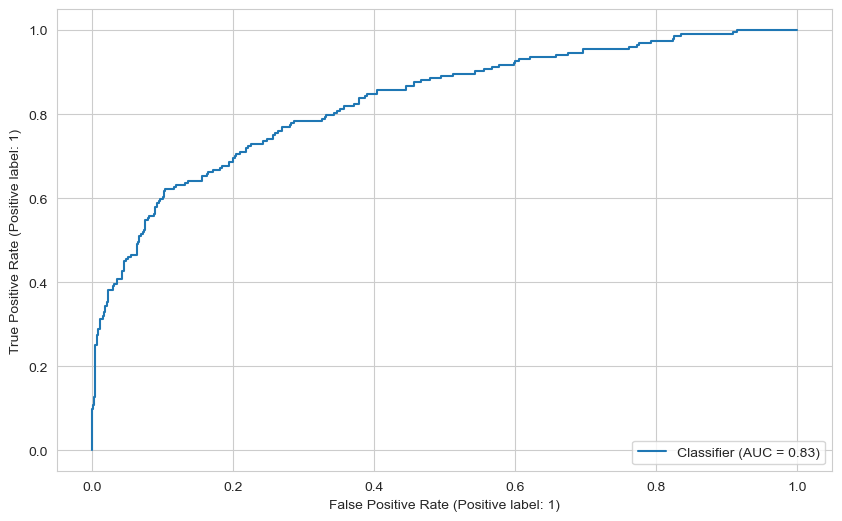

In [101]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [103]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3801591694355011
accuracy:  0.8500000238418579


In [104]:
roc_auc_score(y_test, y_pred_proba)

0.8299463001280916

In [ ]:
model.save('model_cancer.h5')

# Final Model and Model Deployment

In [107]:
import pickle

pickle.dump(scaler, open("scaler_Churn", 'wb'))

In [108]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[758  38]
 [112  92]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       796
           1       0.71      0.45      0.55       204

    accuracy                           0.85      1000
   macro avg       0.79      0.70      0.73      1000
weighted avg       0.84      0.85      0.84      1000



In [109]:
model.save('model_Churn.h5')

## Prediction

In [110]:
from tensorflow.keras.models import load_model

In [111]:
model_Churn = load_model('model_Churn.h5')
#model_cancer = load_model("l1l2_model.h5")
scaler_Churn = pickle.load(open("scaler_Churn", "rb"))

In [113]:
single_patient = df.drop('Exited', axis = 1).iloc[0:1, :]
single_patient

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,0,0,0


In [114]:
single_patient = scaler_Churn.transform(single_patient)
single_patient

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50654122, 0.        , 0.        ,
        0.        ]])

In [115]:
(model_Churn.predict(single_patient) > 0.5).astype("int32")

1/1 [==============================] - 0s 93ms/step


array([[0]])

In [116]:
df['Exited'].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___